In [1]:
import os
os.chdir("Y:\Python\Mega_IT\F.Machine_Learning/2.Unsupervised_Learning/1.KMeans")
os.getcwd()

'Y:\\Python\\Mega_IT\\F.Machine_Learning\\2.Unsupervised_Learning\\1.KMeans'

In [2]:
import sys
sys.path.append("Y:\Python\Mega_IT")

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [4]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *

In [5]:
origin1 = pd.read_excel("./data/game_usage.xlsx")
origin1.head()

,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


- 엘보우 기법
  - 이너셔는 클러스터 수가 많을수록 작아짐

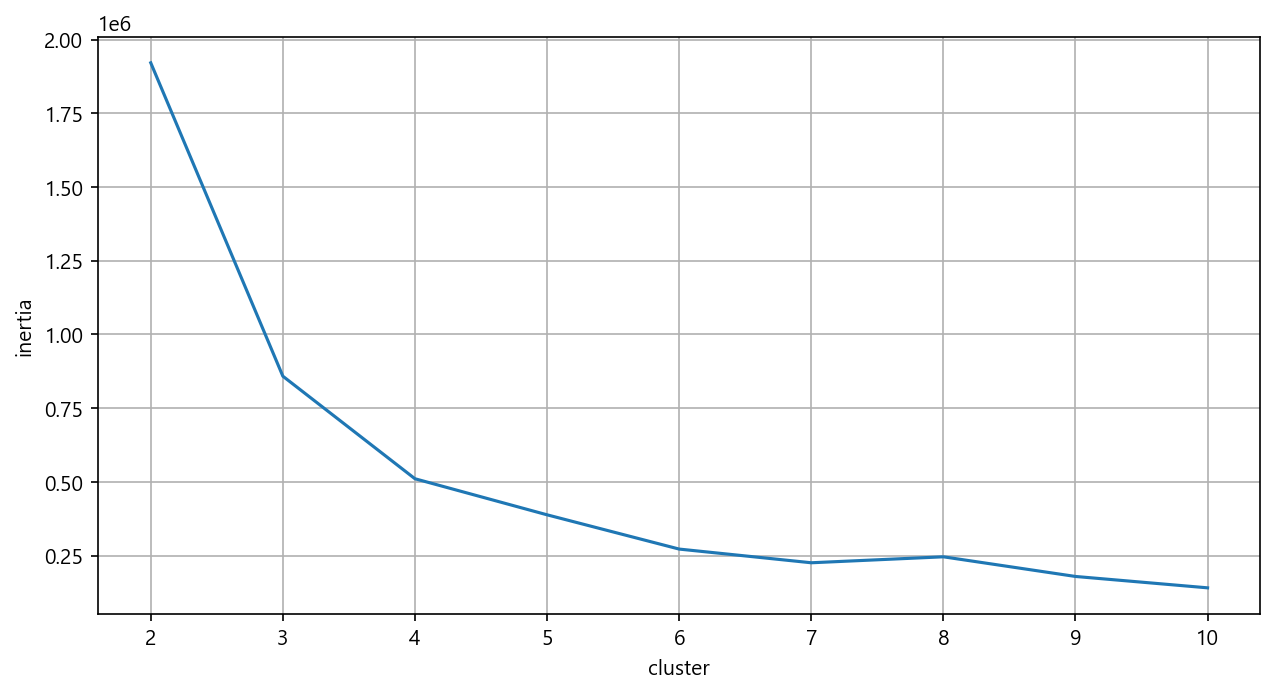

In [6]:
tmp_li = []

for i in range(2, 11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(origin1)
    tmp_li.append(km.inertia_)

plt.figure(figsize = (10, 5), dpi = 150)
plt.plot(range(2, 11), tmp_li)
plt.xlabel("cluster")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [7]:
origin2 = pd.read_excel("./data/iris.xlsx")

In [8]:
df2 = my_minmax_scaler(origin2)
df2.drop('Species', axis = 1, inplace = True)
df2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [9]:
estimator = KMeans(n_clusters = 3, random_state = 0)
estimator.fit(df2)

KMeans(n_clusters=3, random_state=0)

In [10]:
result_df = df2.copy()
result_df['cluster'] = estimator.labels_
result_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [11]:
estimator.cluster_centers_

array([[0.41203704, 0.27690972, 0.55896893, 0.52083333],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.66773504, 0.44310897, 0.7571708 , 0.78205128]])

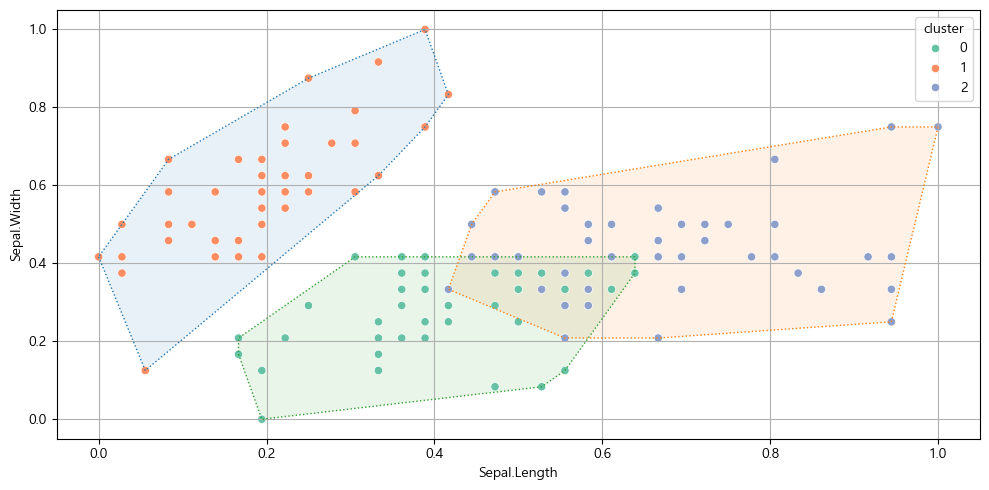

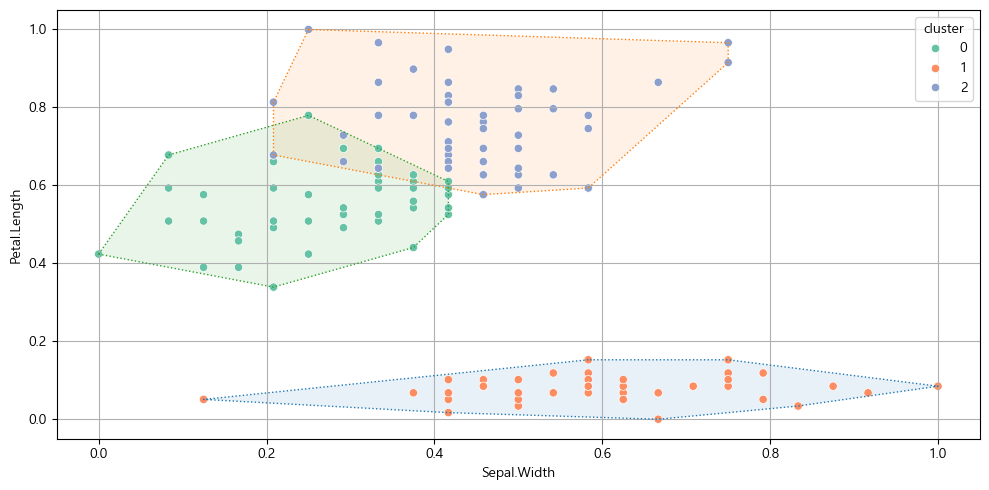

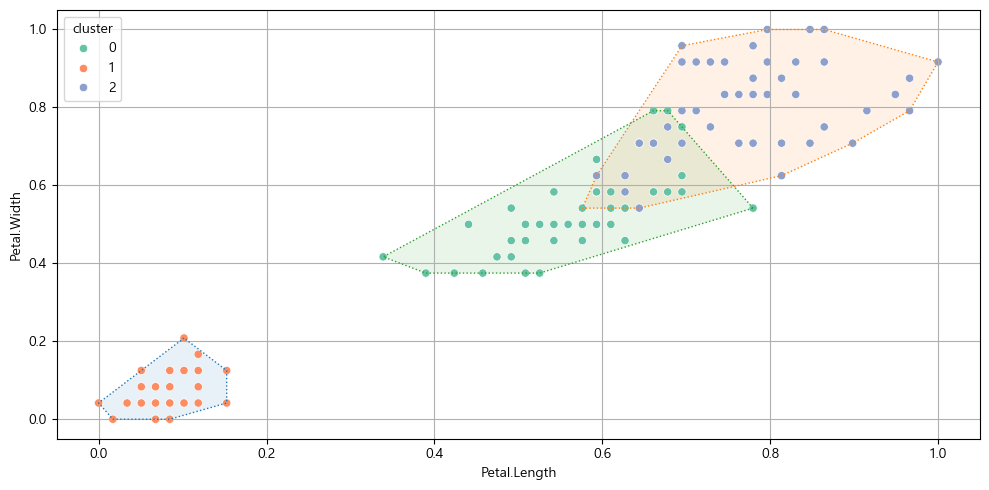

In [12]:
my_scatter_by_class(result_df, hue = 'cluster', outline = True, palette = 'Set2')

- 군집화 시각화는 PCA를 통해 차원 축소 후 그래프 갯수를 줄이는 쪽이 간결함

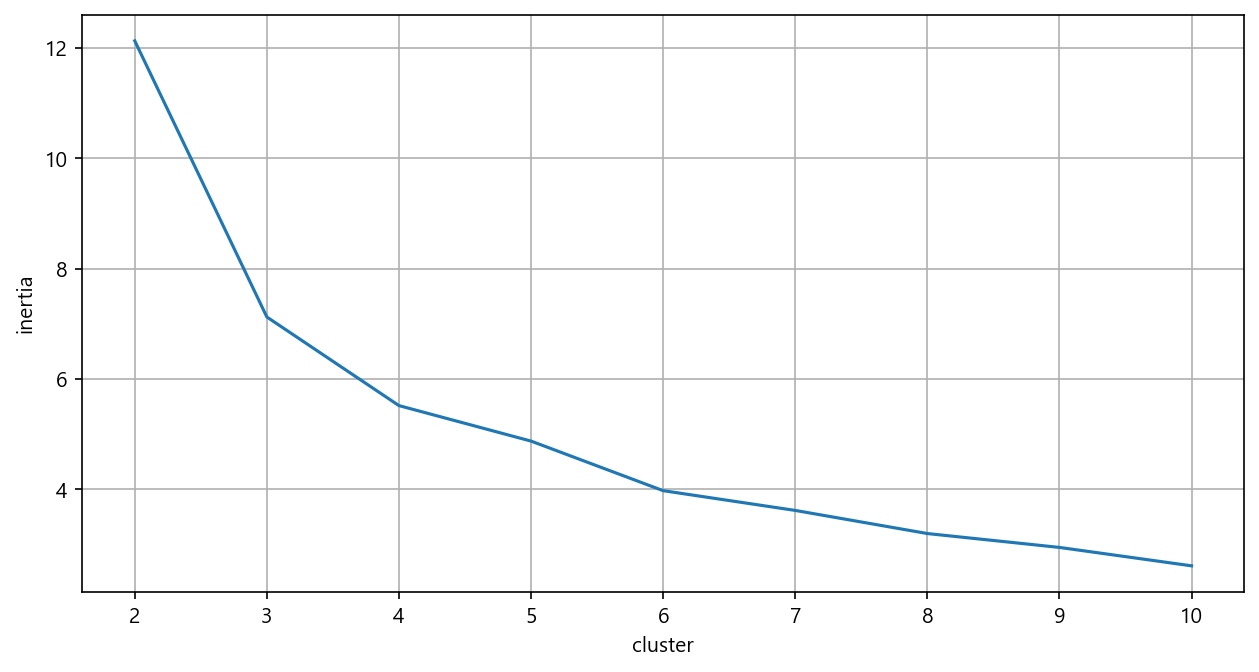

In [13]:
tmp_li = []

for i in range(2, 11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(df2)
    tmp_li.append(km.inertia_)

plt.figure(figsize = (10, 5), dpi = 150)
plt.plot(range(2, 11), tmp_li)
plt.xlabel("cluster")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [14]:
change_rates = [0]
for i in range(1, len(tmp_li)):
    change_rate = (tmp_li[i] - tmp_li[i-1]) / tmp_li[i-1]
    change_rates.append(change_rate)

change_rates

[0,
 -0.41269186454031076,
 -0.2254489715227212,
 -0.11660488725518664,
 -0.18432094192729304,
 -0.09007944350735178,
 -0.11580330993734561,
 -0.07868171826645436,
 -0.11318217541292909]

- 변화율 평균과 평균 변화율보다 크게 감소하는 첫 번째 지점

In [15]:
avg_change_rate = np.mean(change_rates)
avg_change_rate

-0.1485348124855103

In [16]:
elbow_point = next((i for i, rate in enumerate(change_rates) if rate < avg_change_rate), None)
elbow_point

1

In [17]:
range(2, 11)[elbow_point]

3

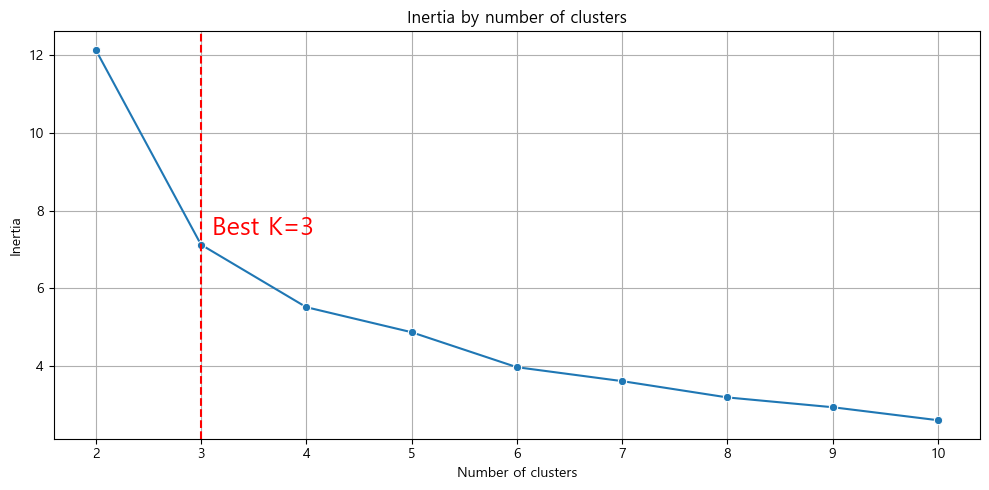

In [18]:
def my_callback(ax):
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Inertia')
    ax.set_title('Inertia by number of clusters')
    ax.axvline(x=range(2, 11)[elbow_point], color='r', linestyle='--')

    ax.text(
        range(2, 11)[elbow_point]+0.1, tmp_li[elbow_point]+0.1, "Best K=%d" % range(2, 11)[elbow_point], fontsize=18, ha="left", va="bottom", color="r"
    )

my_lineplot(df=None, xname=range(2, 11), yname=tmp_li, marker="o", callback=my_callback)

- 실루엣 계수(점수)를 통한 적합한 군집 개수 찾기
  - 효율적 분리 : 어떤 한 점이 다른 군집과는 멀고 동일 군집끼리는 가까이 뭉친 것
  - 실루엣 점수는 각 데이터 포인터마다 존재
    - 하나의 점수로는 이를 평균한 값을 사용
  - -1 ~ 1의 범위, 1에 가까울수록 좋은 군집 분리

In [19]:
silhouette_samples(df2, km.labels_)[:5]

array([0.32077739, 0.60056324, 0.58058007, 0.64479572, 0.37720751])

- 0.5 이상이면 좋은 군집화가 됨

In [20]:
silhouette_score(df2, km.labels_, metric = 'euclidean')

0.3463959949845726

- 클러스터 시각화 : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
  - 1번째 그래프
    - 막대의 높이는 군집의 데이터 개수 : 막대의 높이가 균일해야 (= 군집간 크기가 비슷해야) 좋은 분류 (1순위)
    - 동시에 실루엣 스코어가 높은 군집화를 채택
  - 2번째 그래프
    - 각 클러스터 / 군집 중심점 시각화

In [21]:
def visualize_silhouette(estimator, X_features, cluster_labels, n_cluster): 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

    sil_avg = silhouette_score(X=X_features, labels=cluster_labels)
    sil_values = silhouette_samples(X=X_features, labels=cluster_labels)

    y_lower = 10
    plt.suptitle('Number of Cluster : '+ str(n_cluster)+', ' \
                        'Silhouette Score :' + str(round(sil_avg,3)) )
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
    for i in range(n_cluster):
        ith_cluster_sil_values = sil_values[cluster_labels==i]
        ith_cluster_sil_values.sort()

        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                            facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=sil_avg, color="red", linestyle="--")


      # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
    ax2.scatter(
        X_features[X_features.columns[0]], X_features[X_features.columns[1]], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = estimator.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="r",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.show()
    plt.close()

In [22]:
km = KMeans(n_clusters = 3)
km.fit(df2)

KMeans(n_clusters=3)

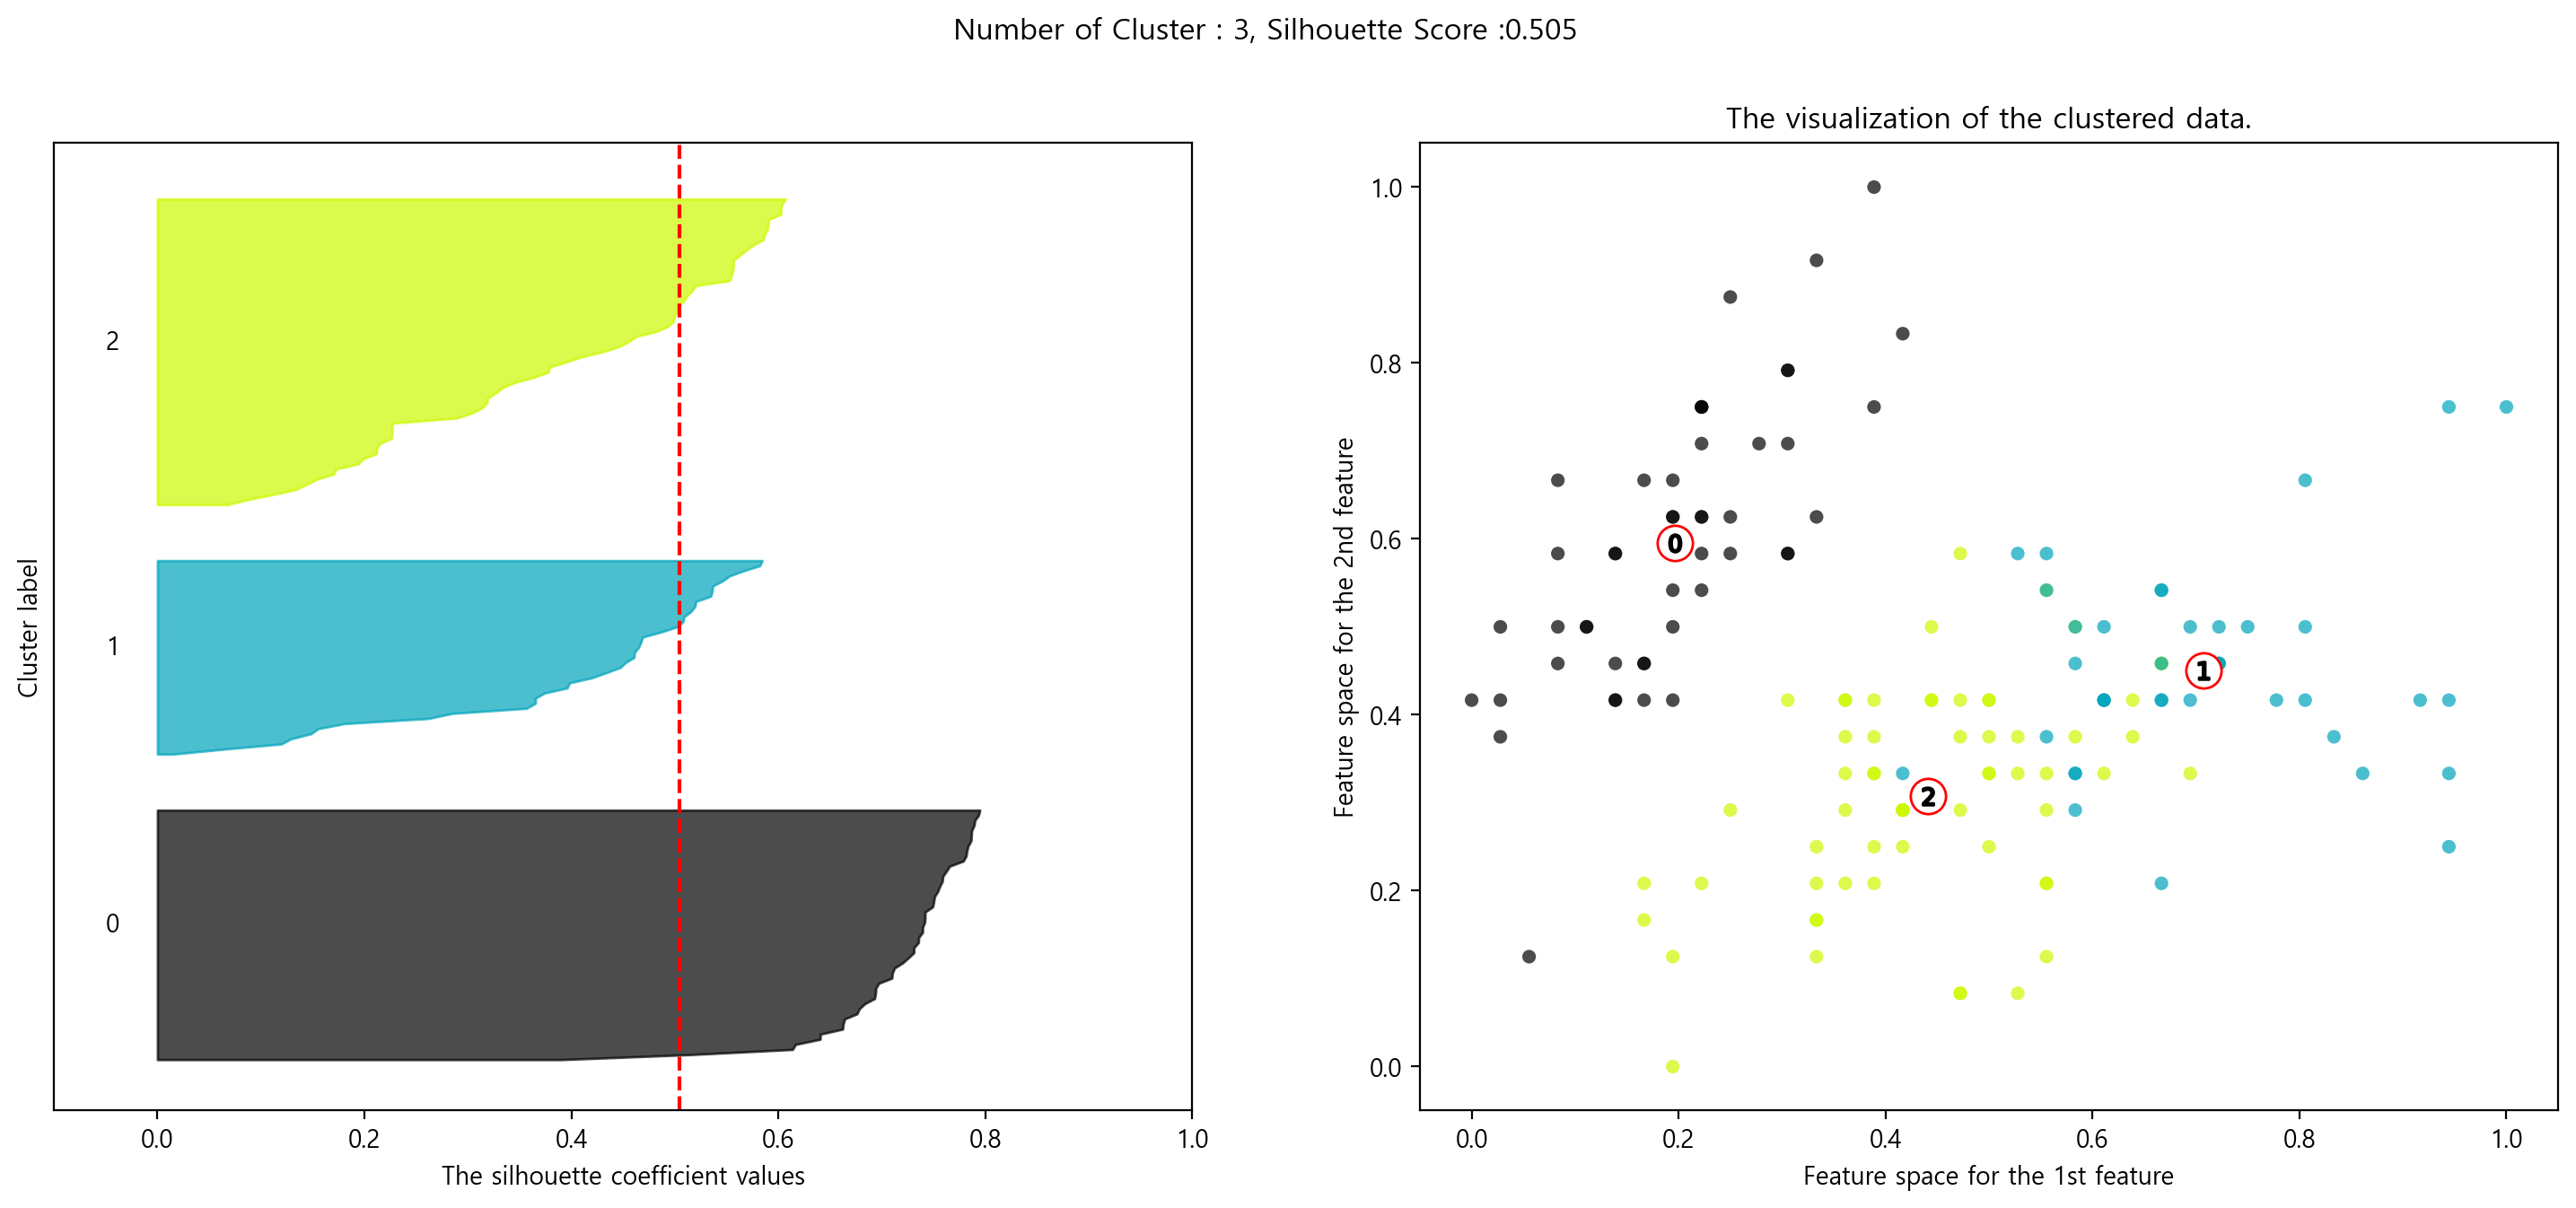

In [23]:
visualize_silhouette(estimator=km, X_features=df2, cluster_labels=km.labels_, n_cluster=3)

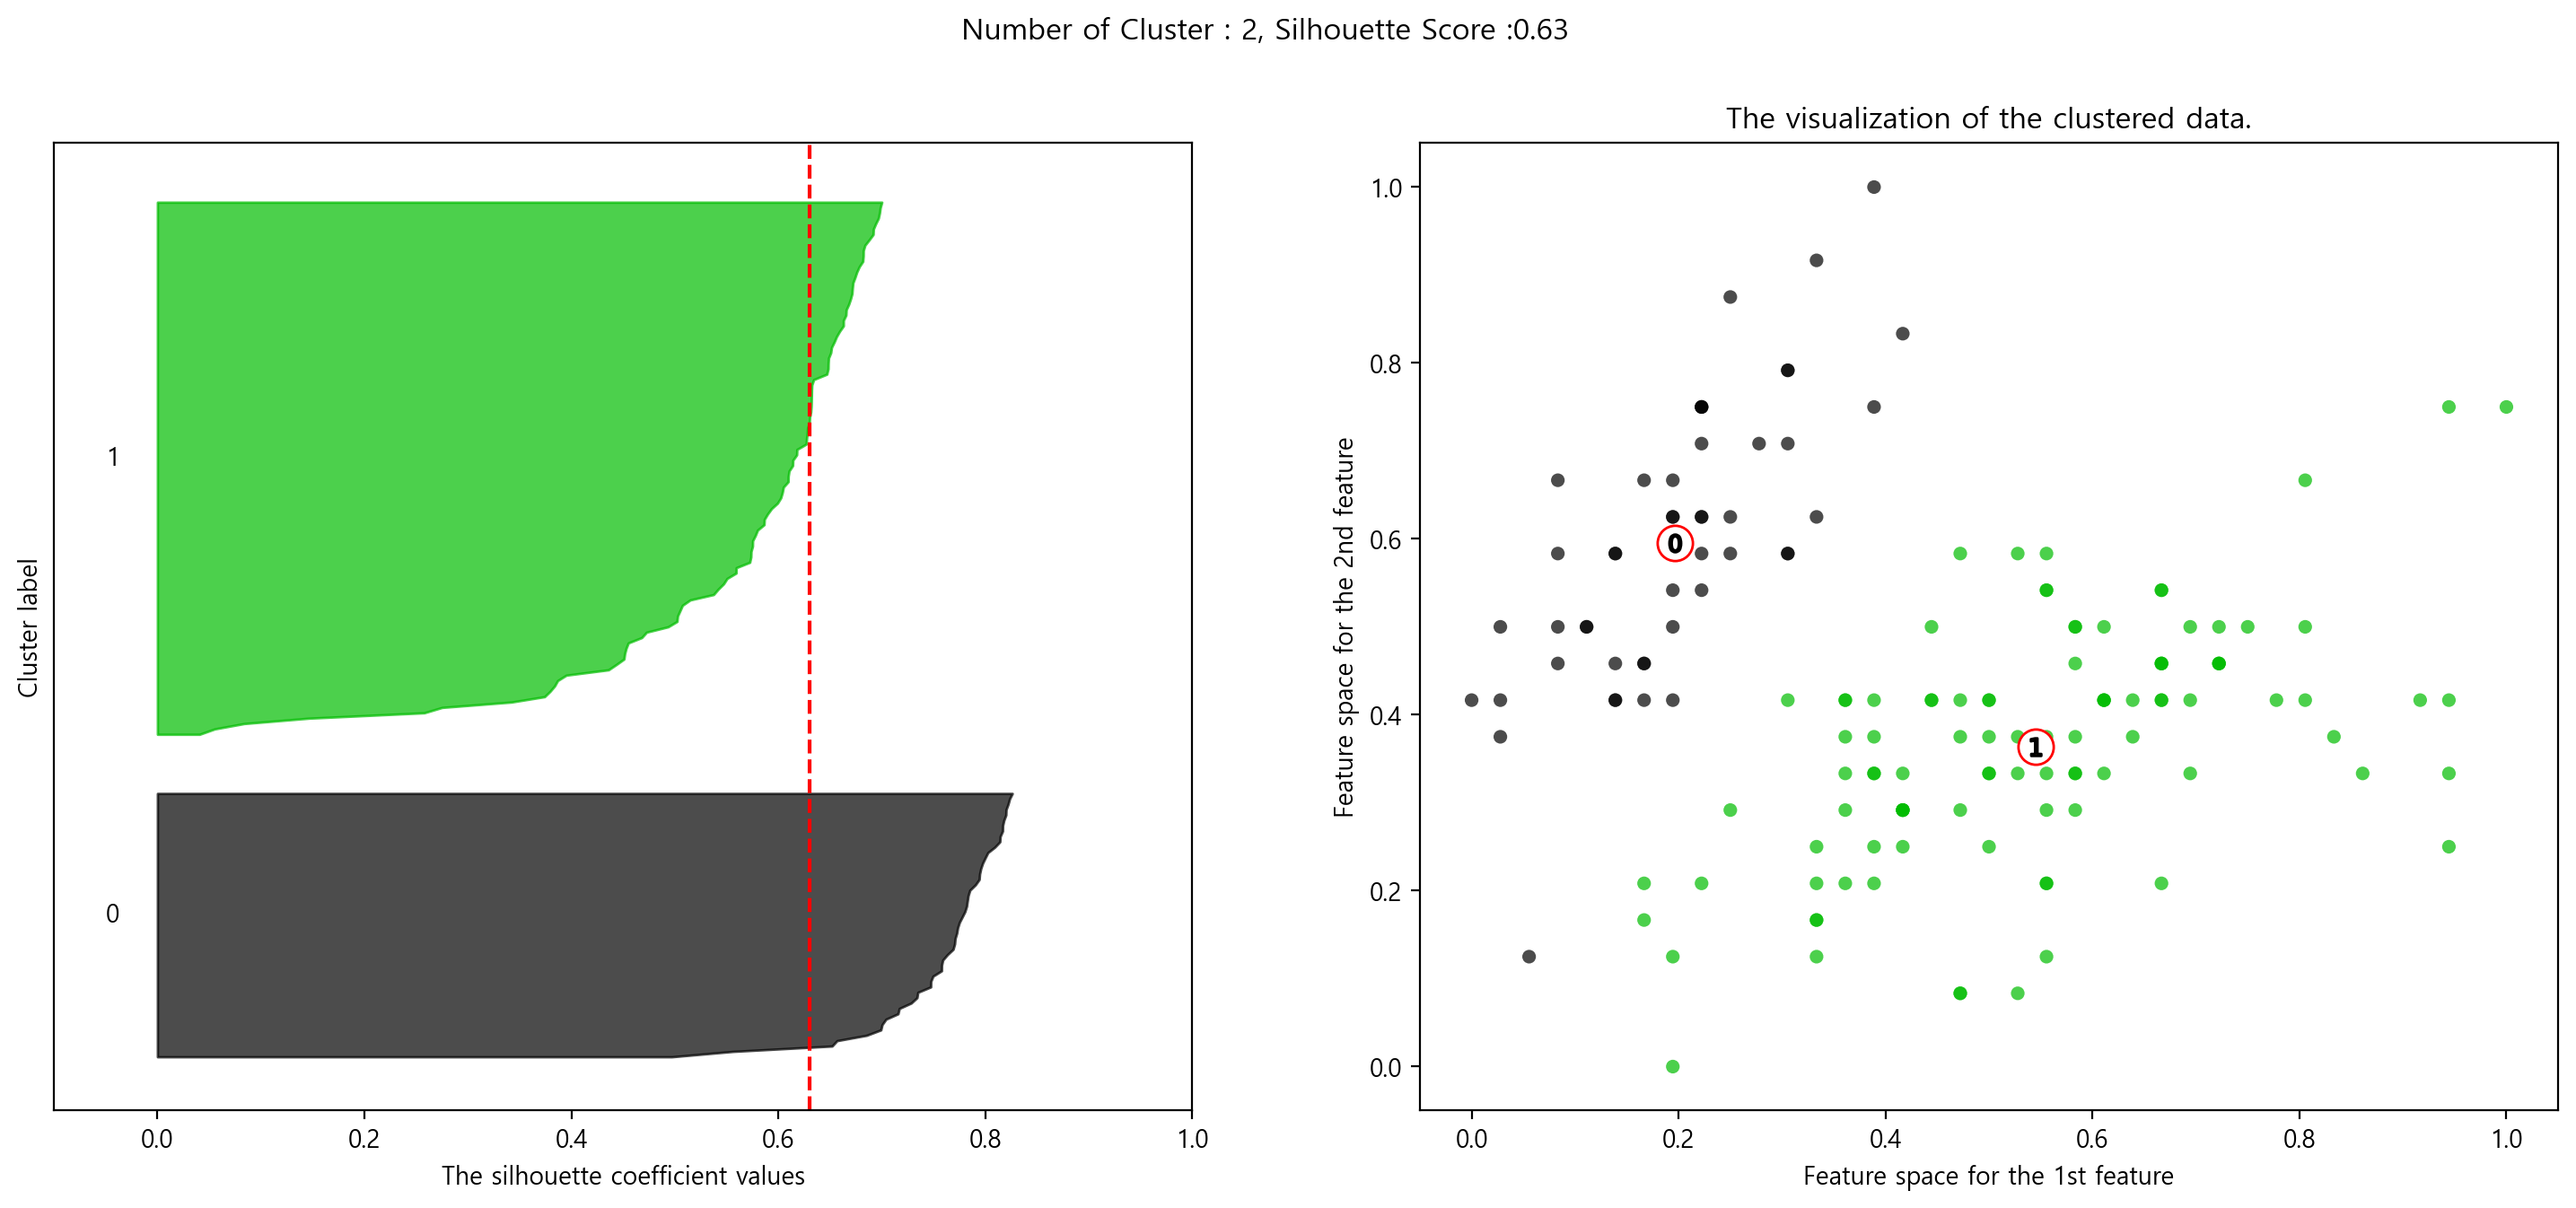

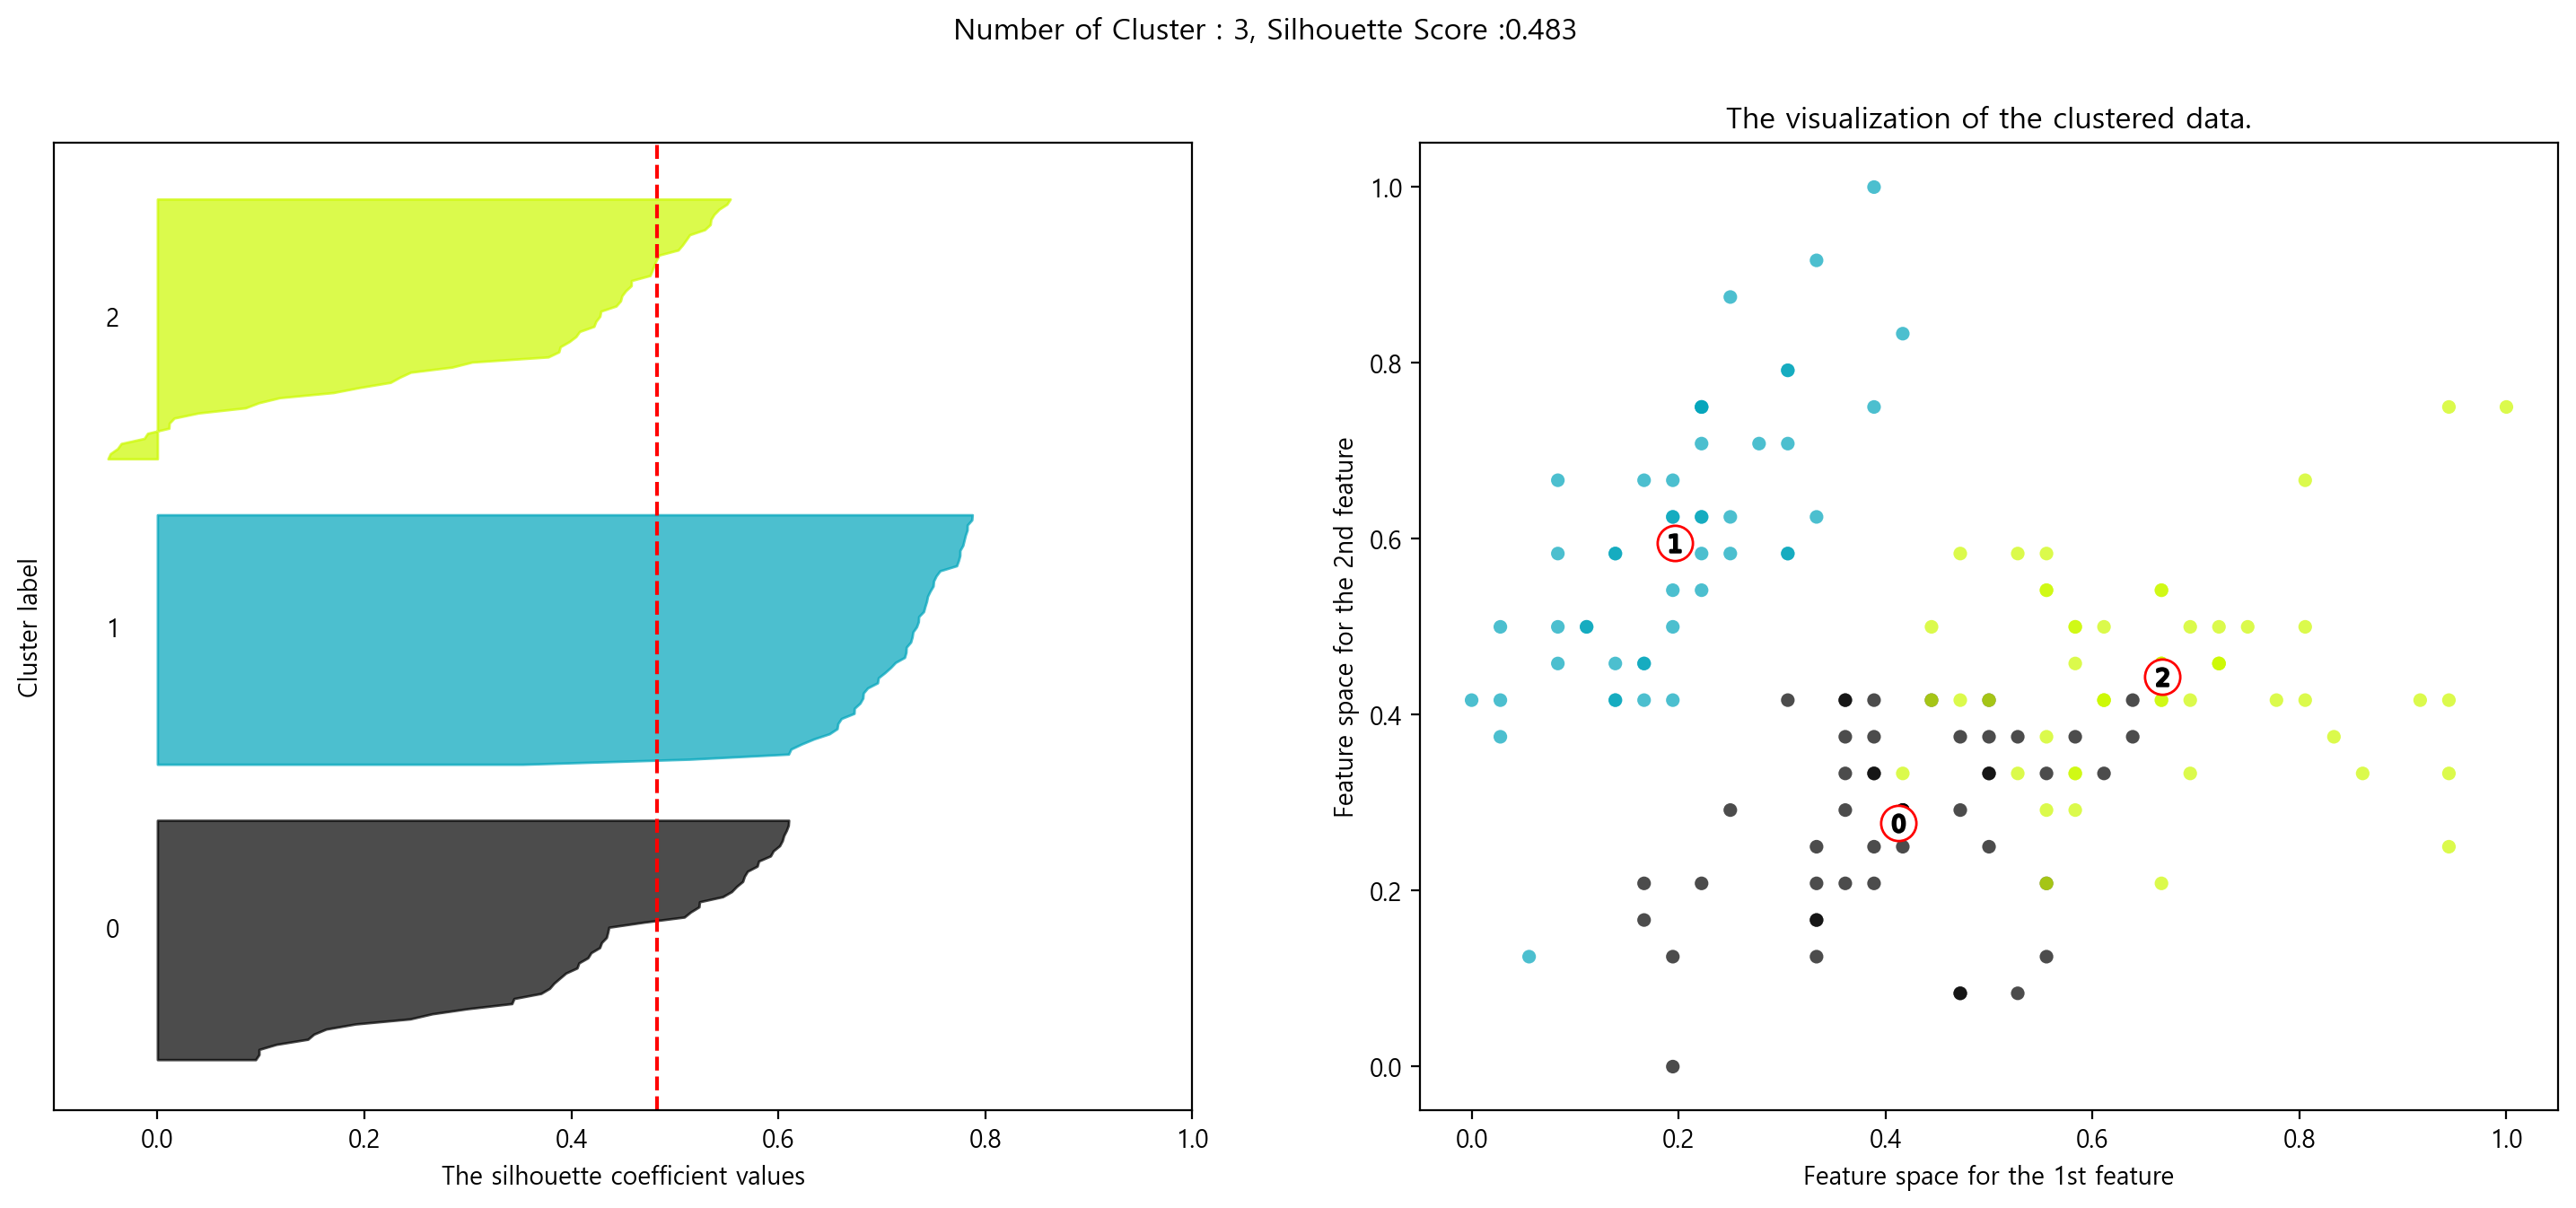

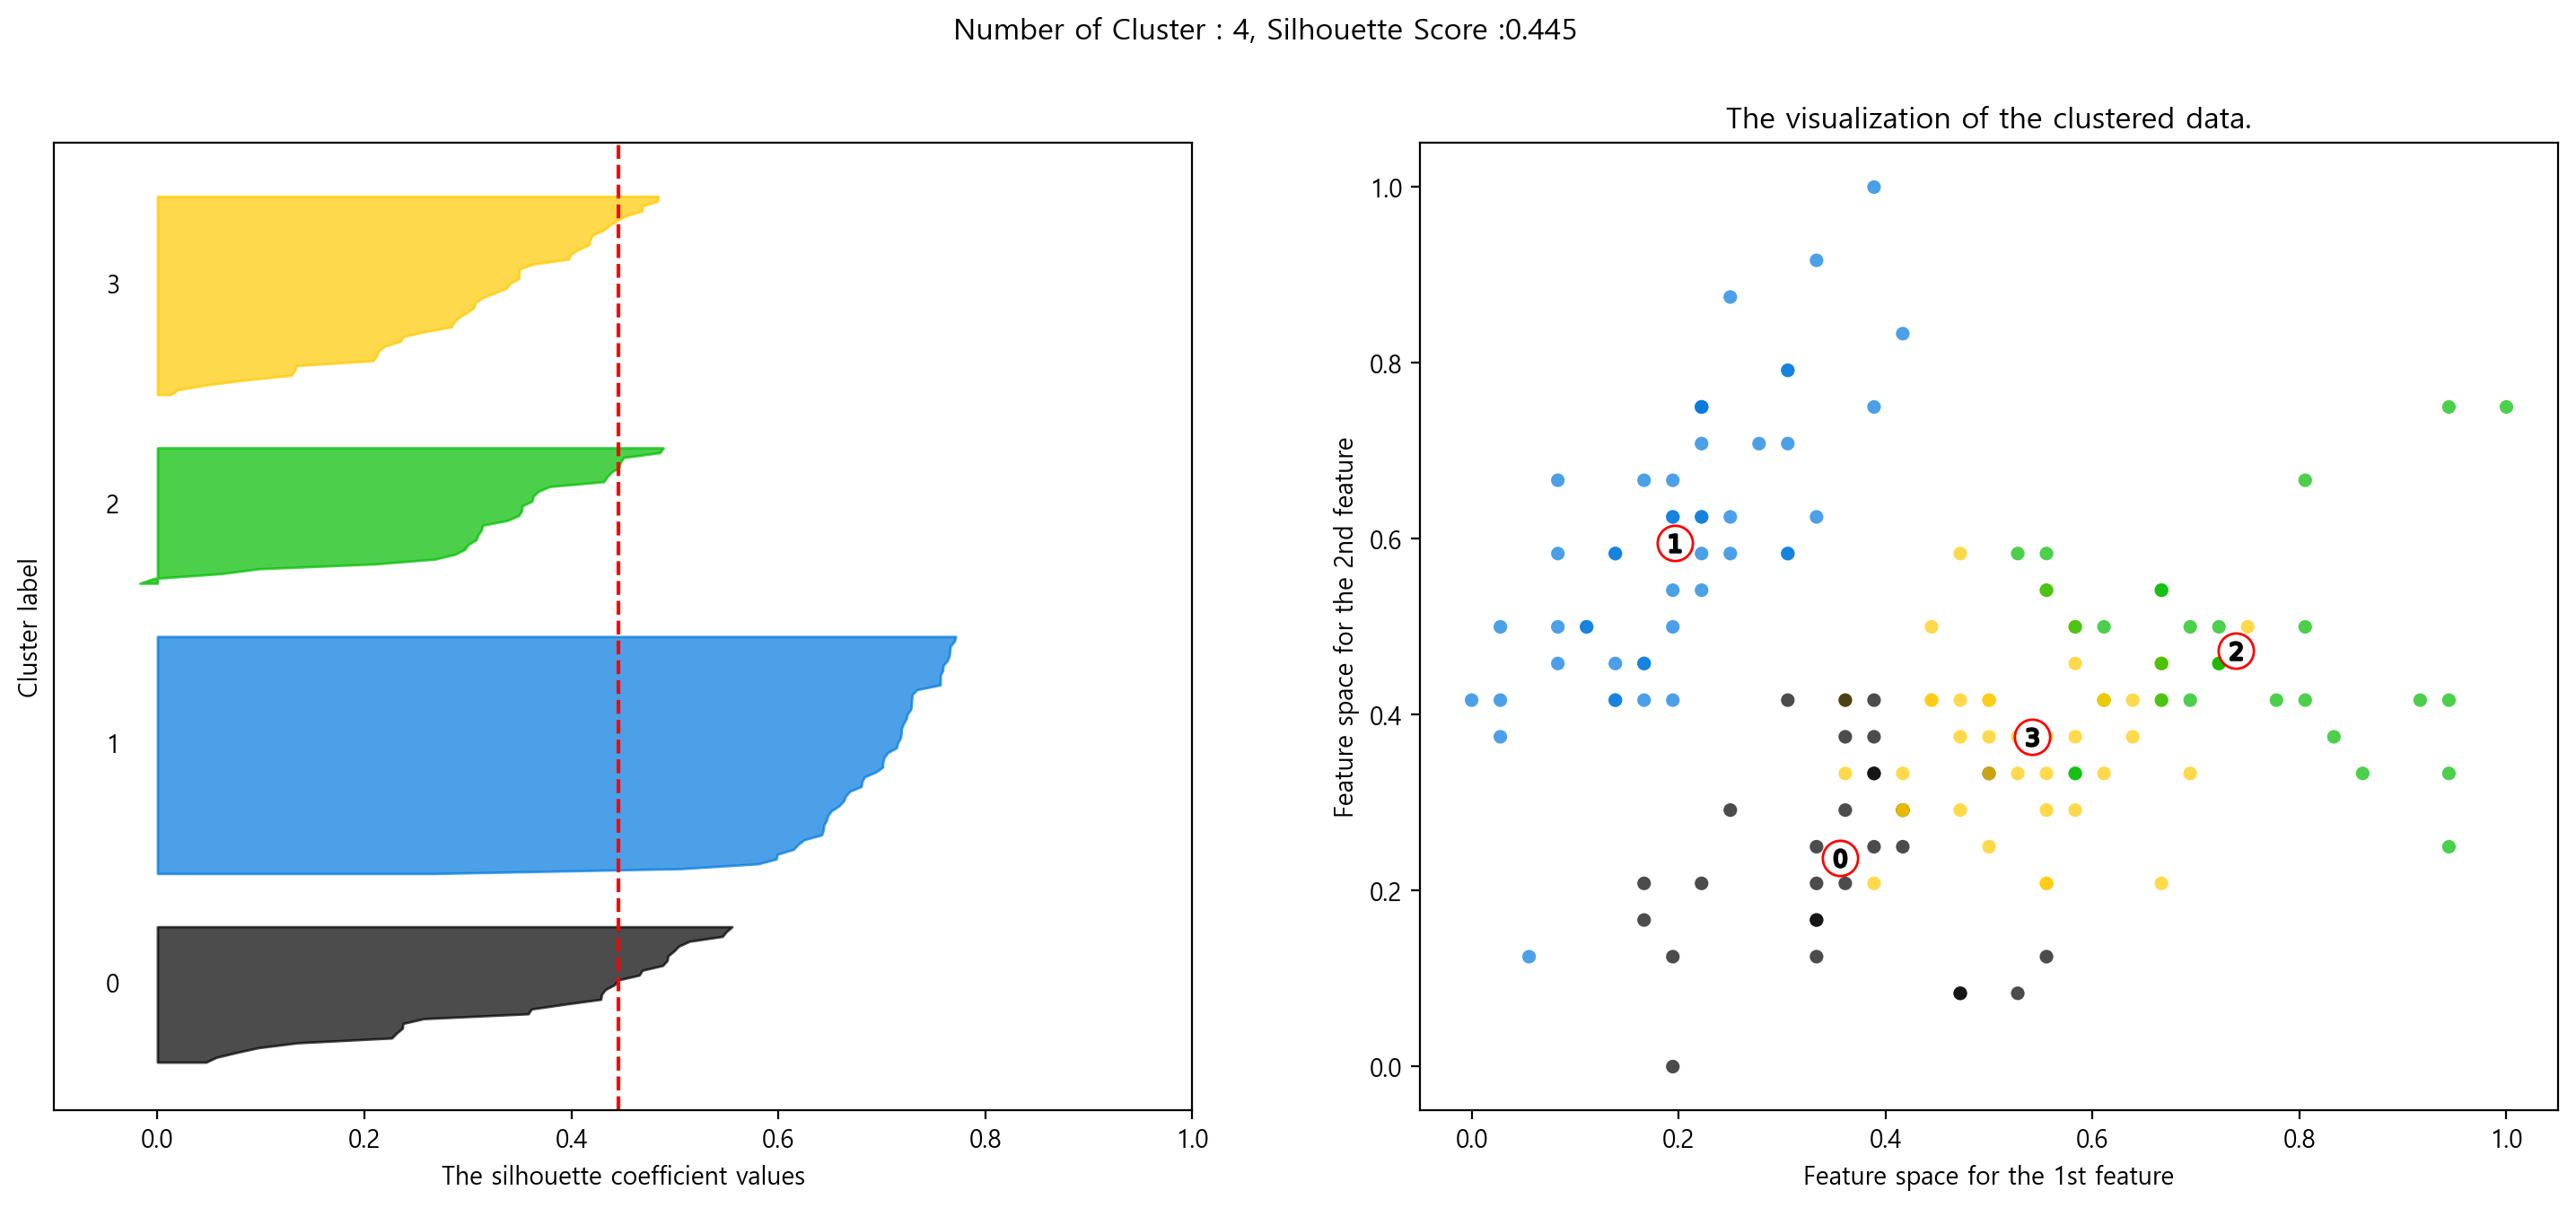

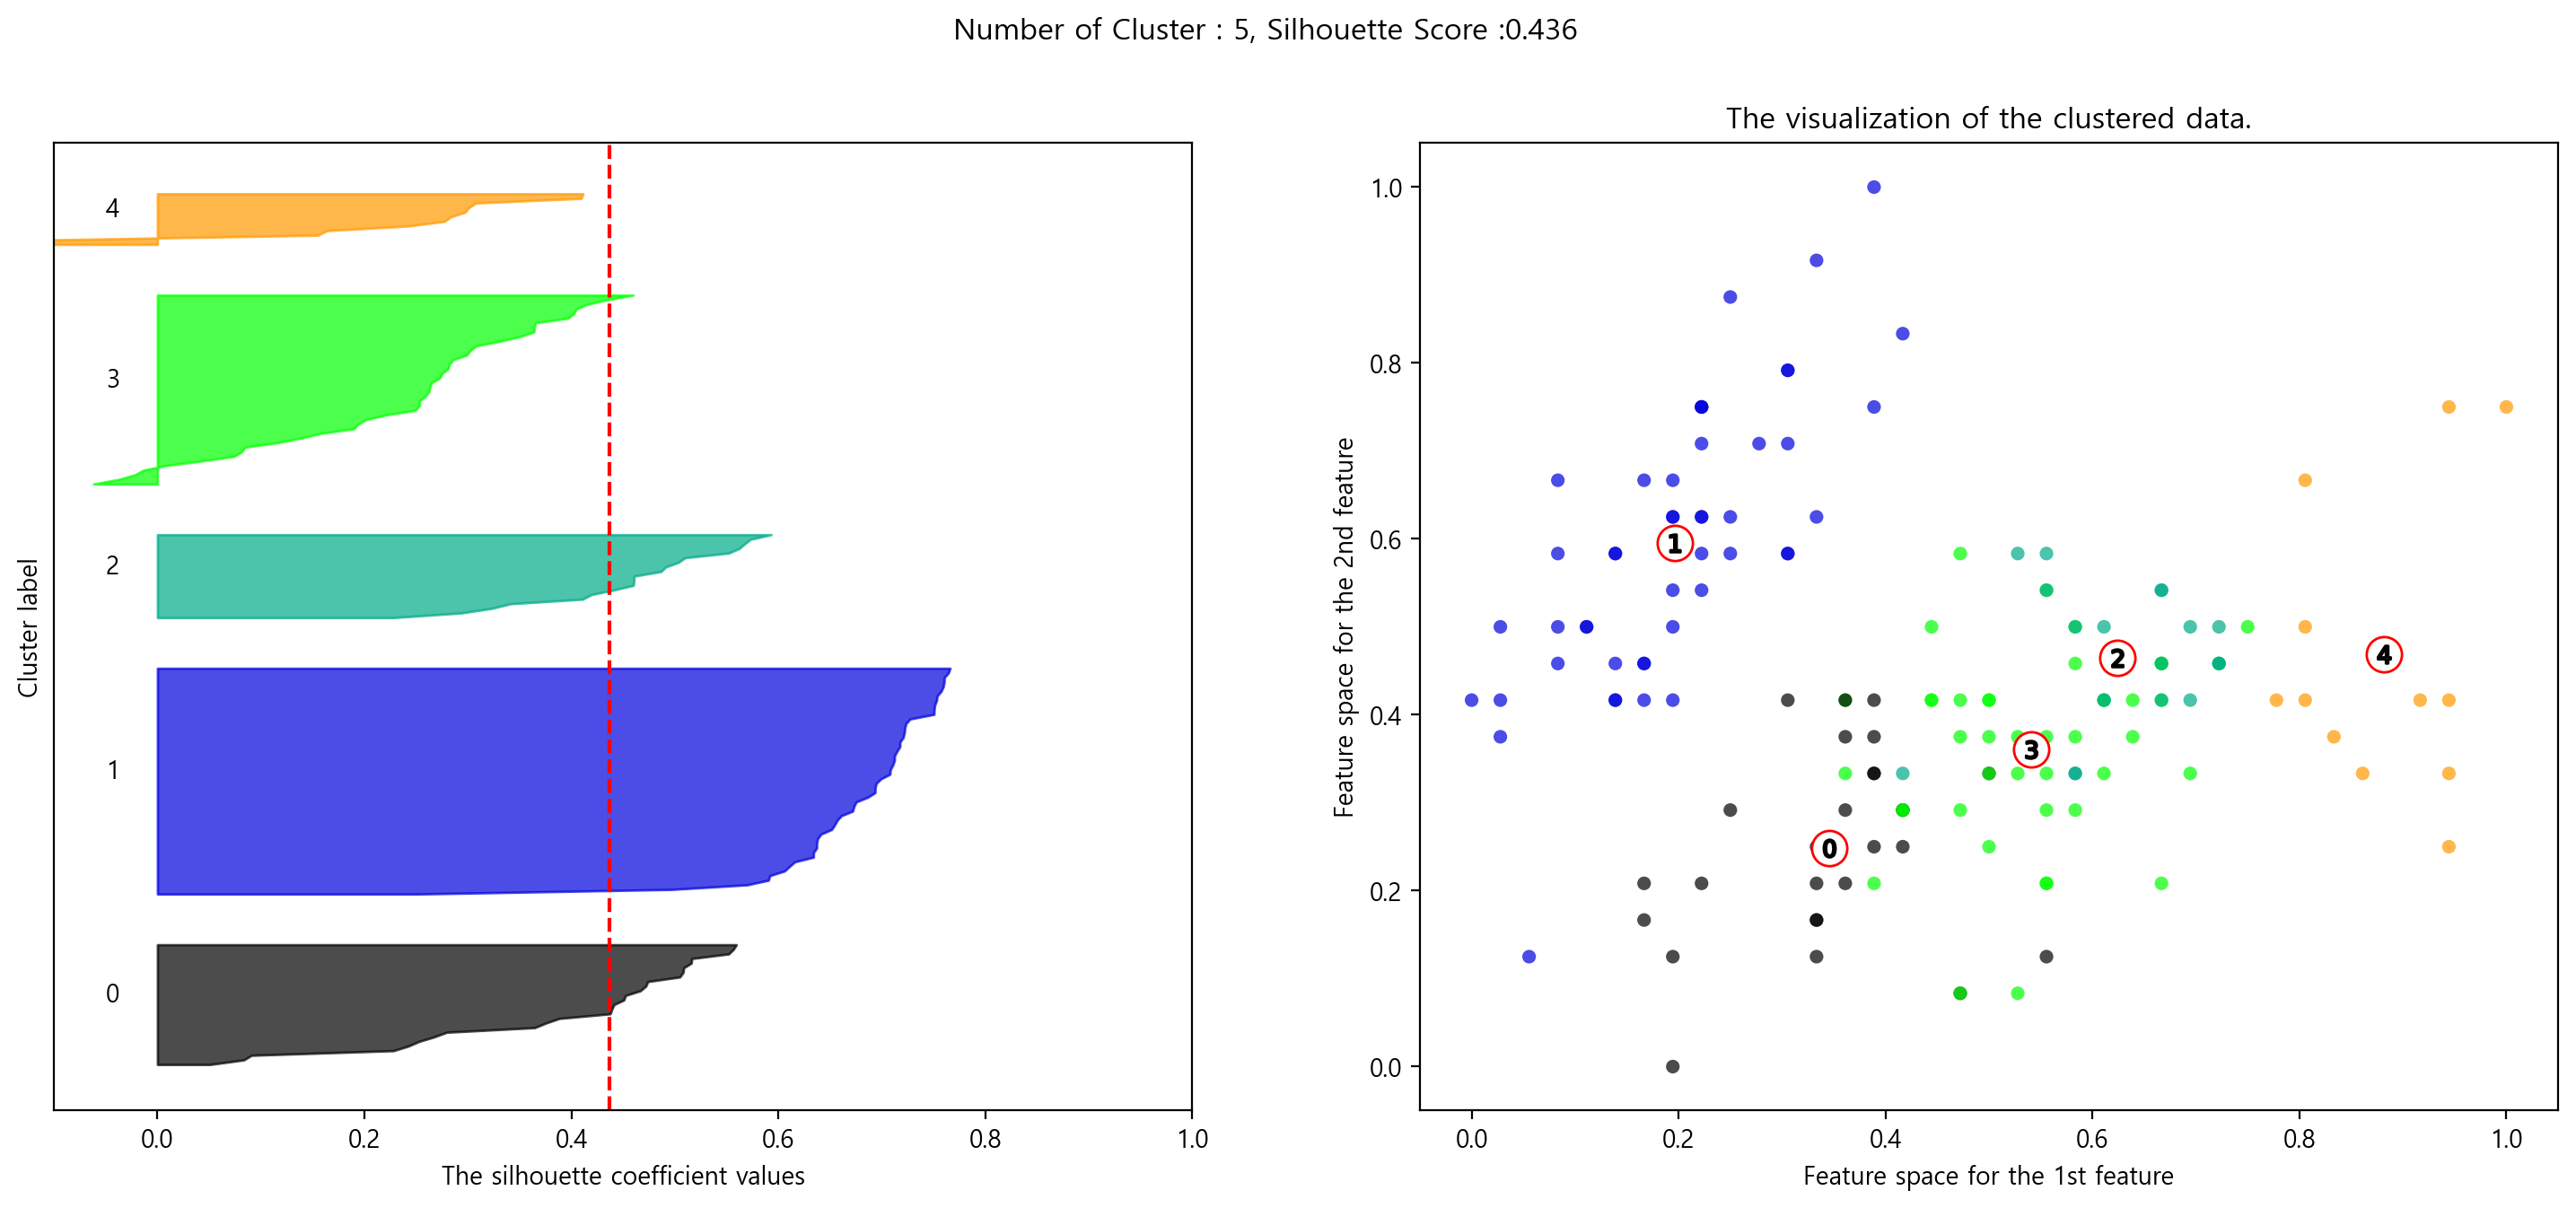

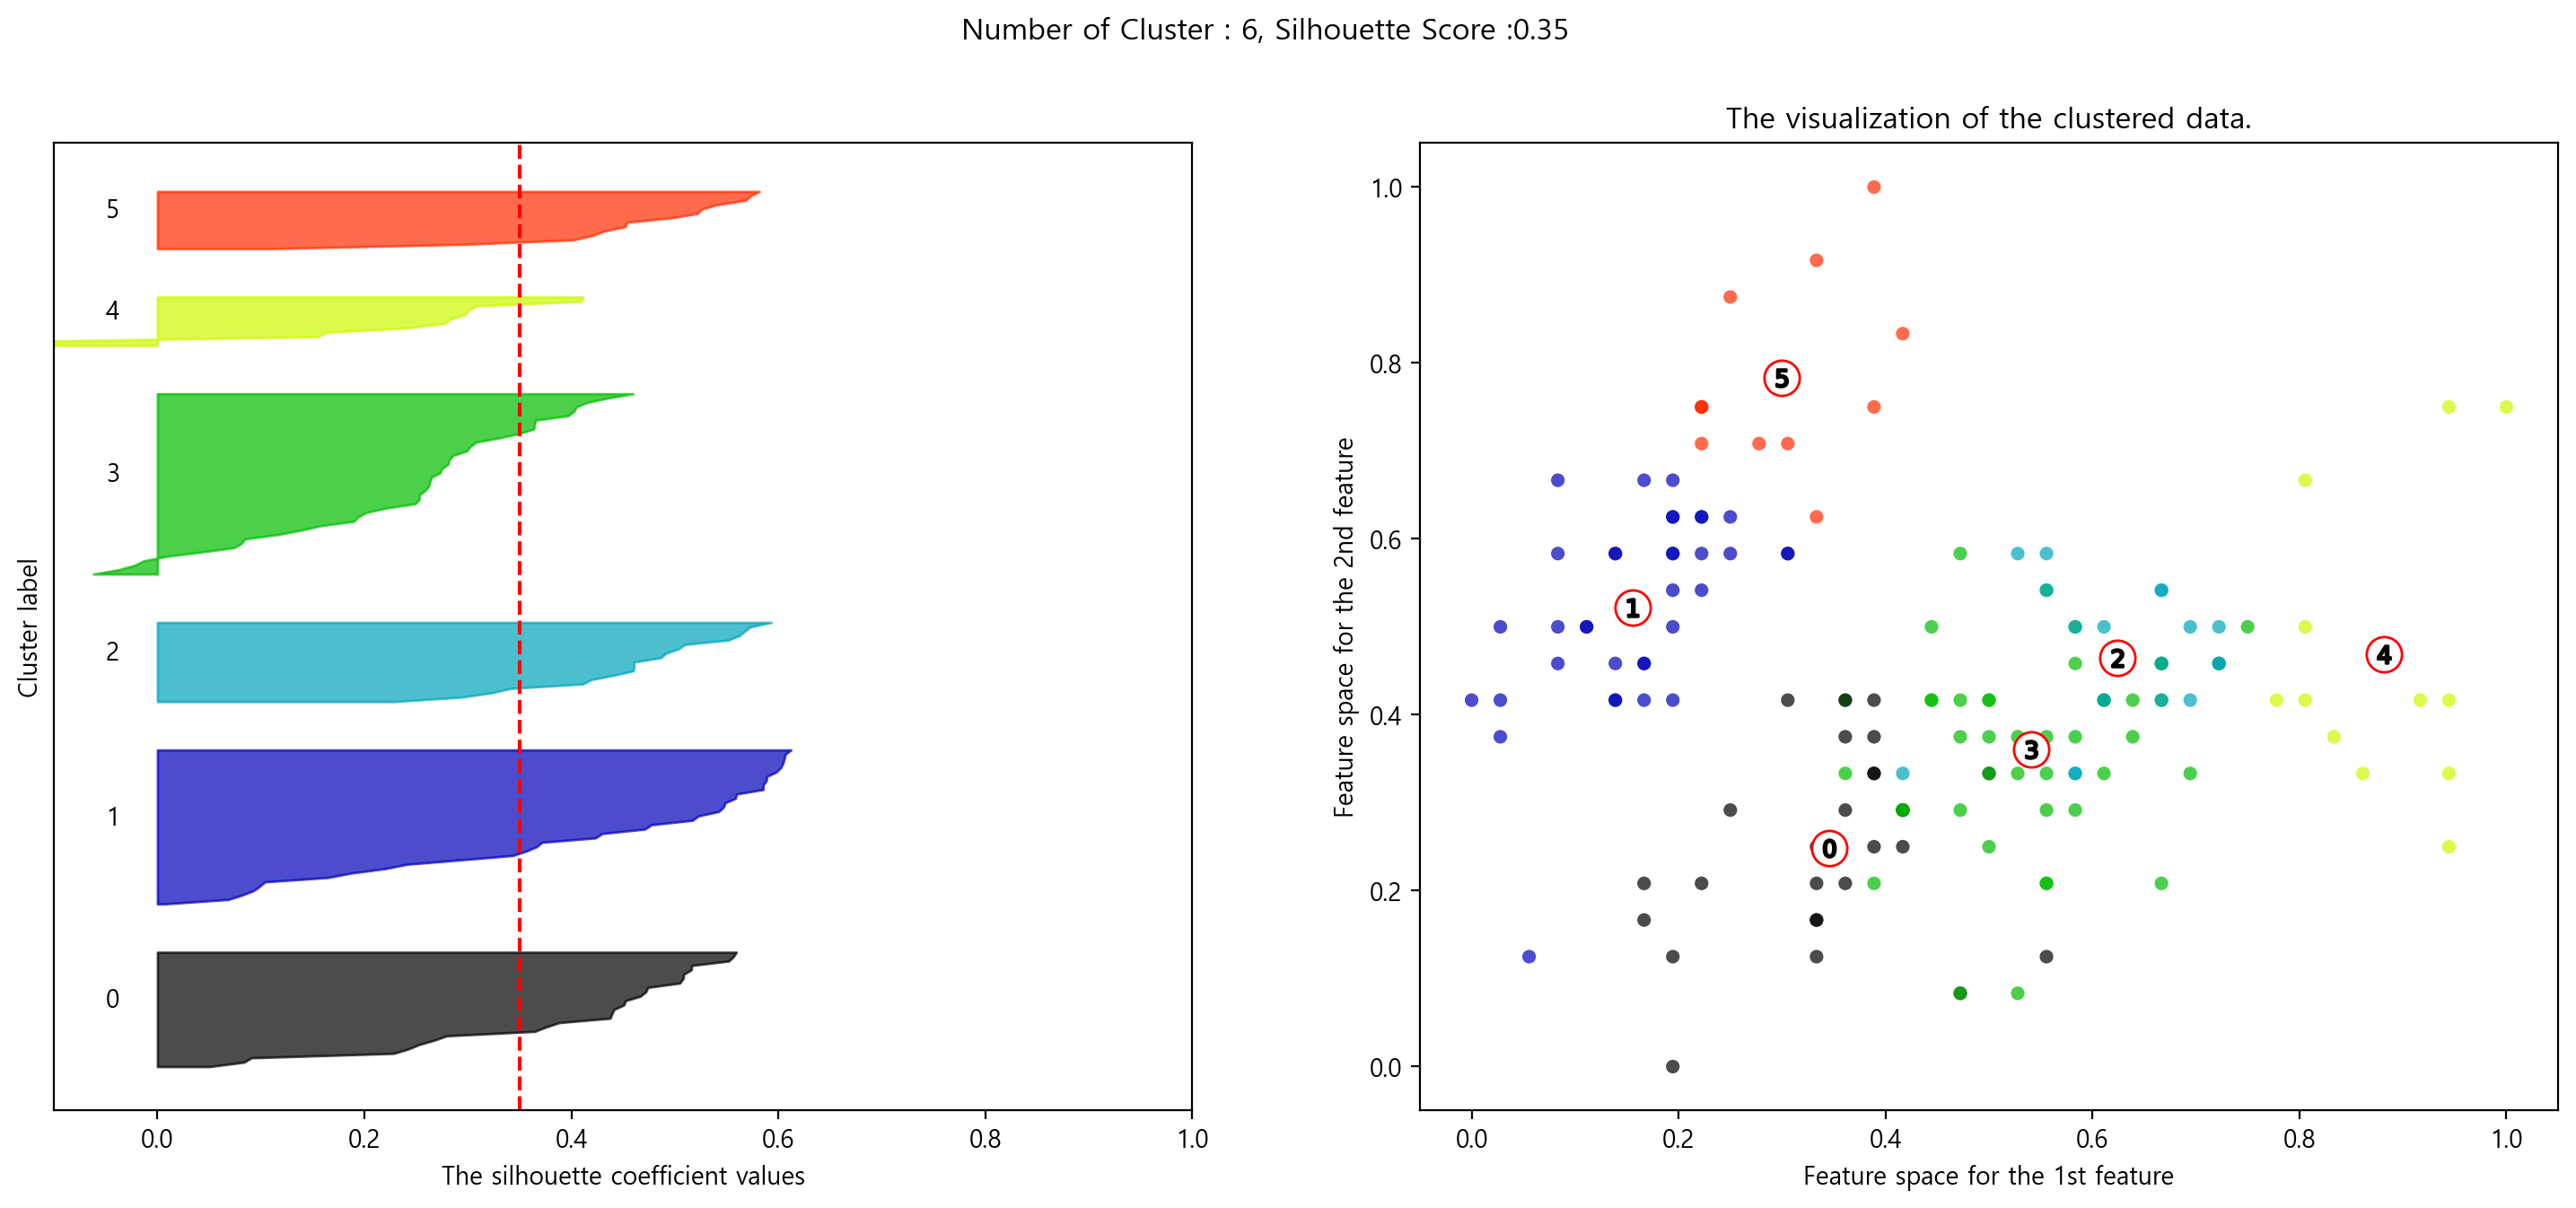

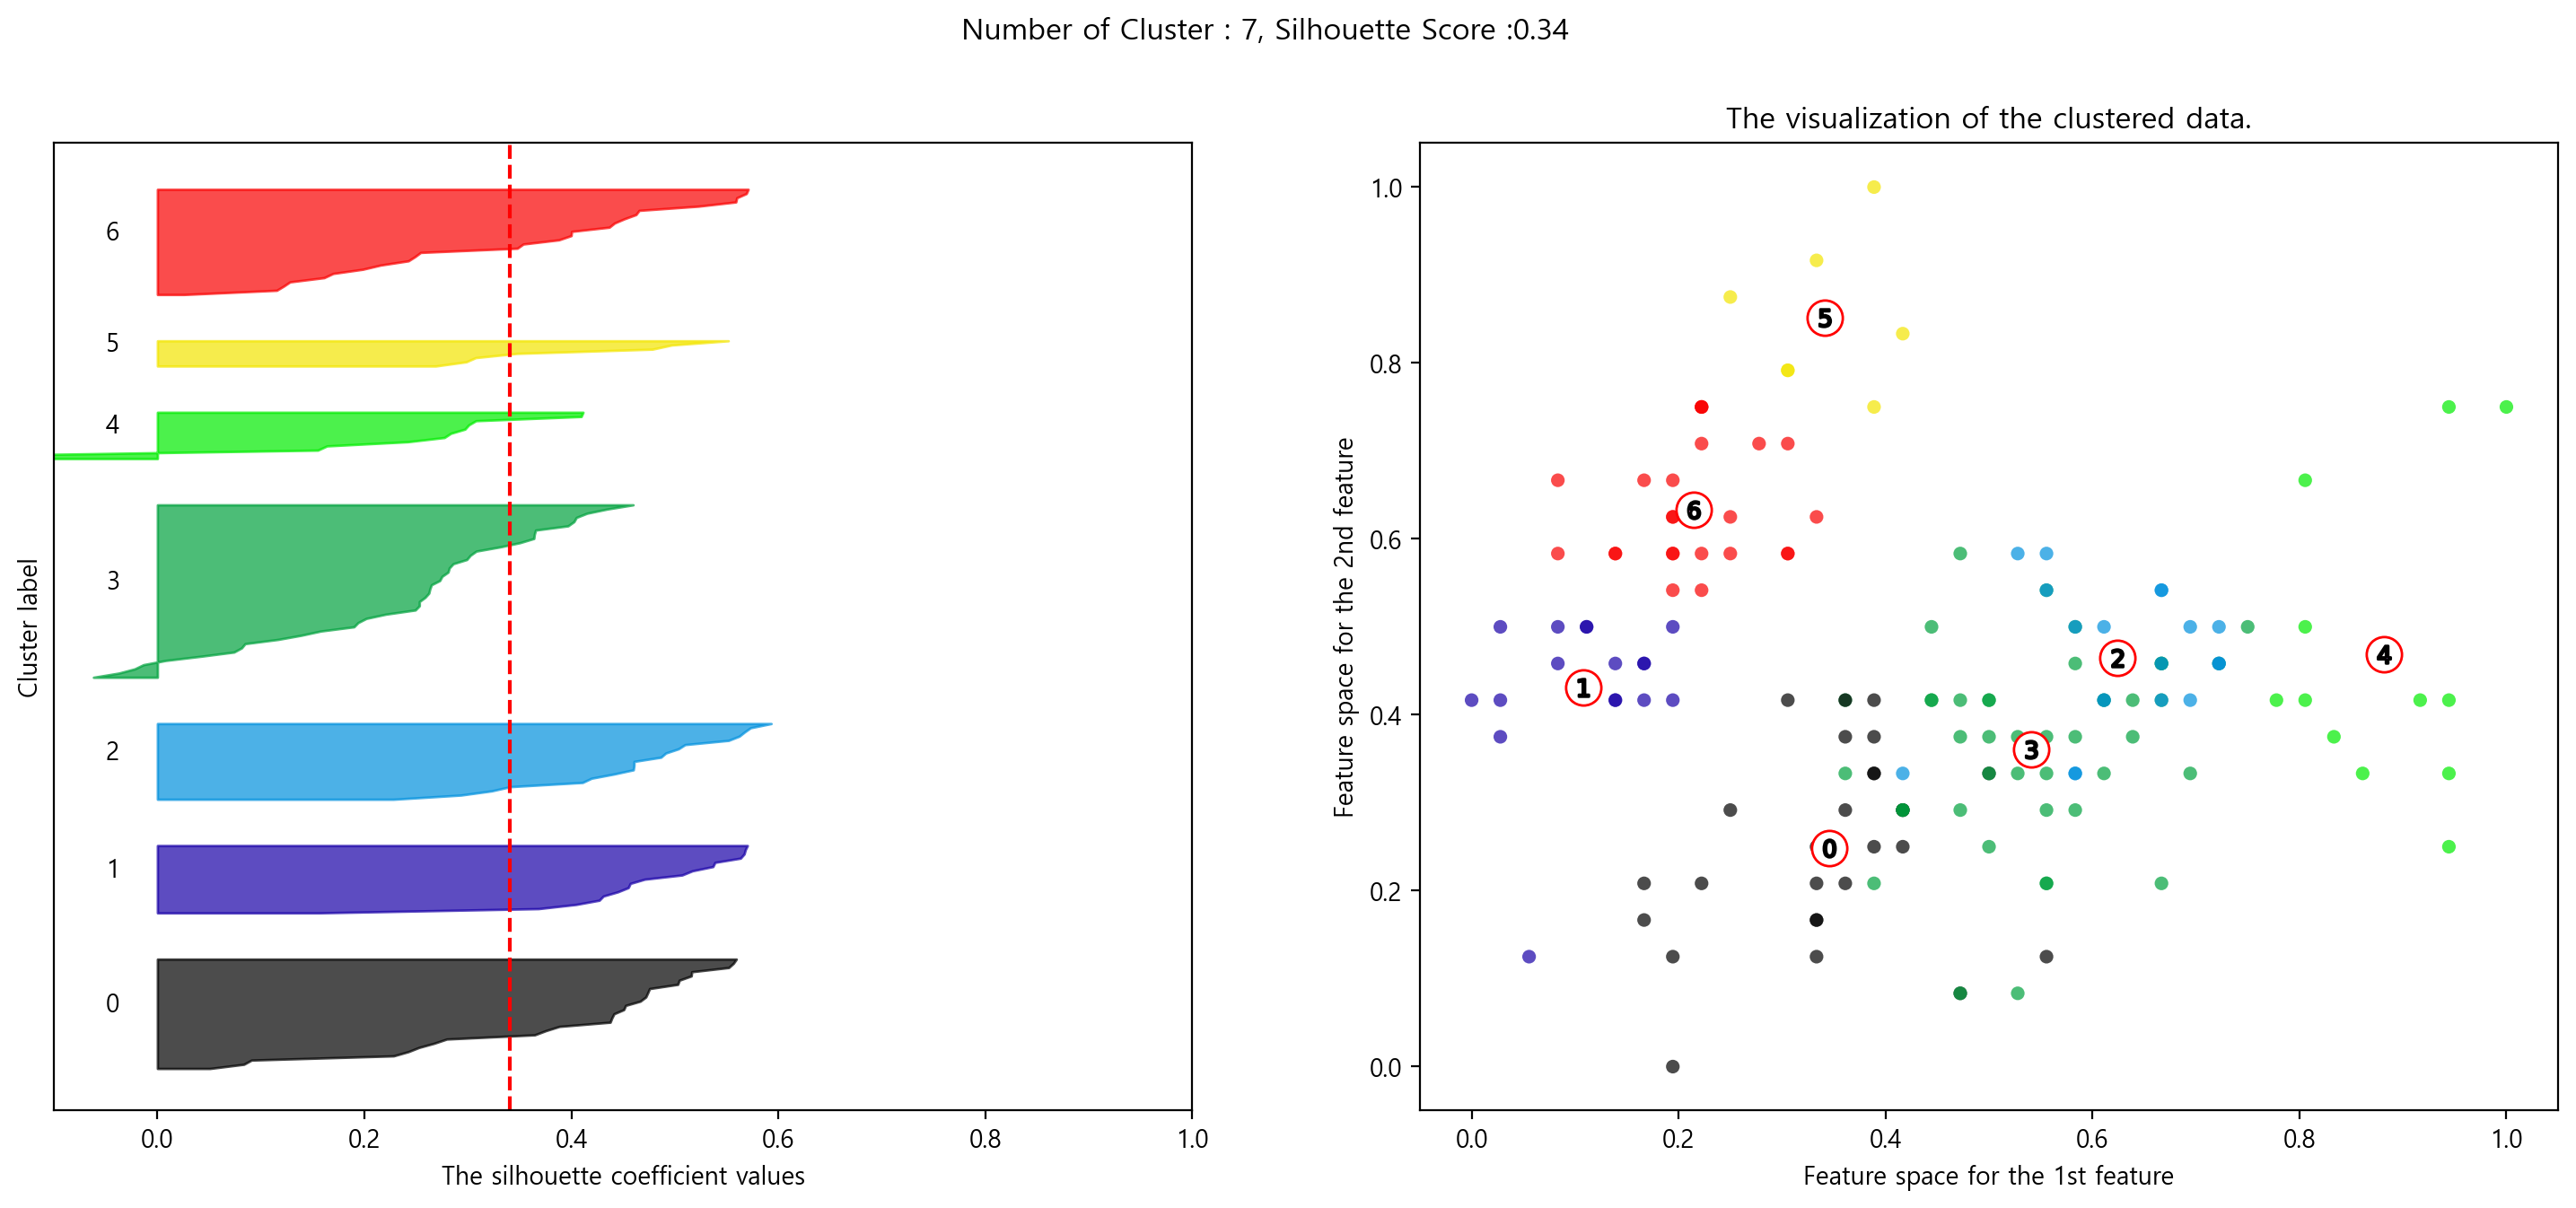

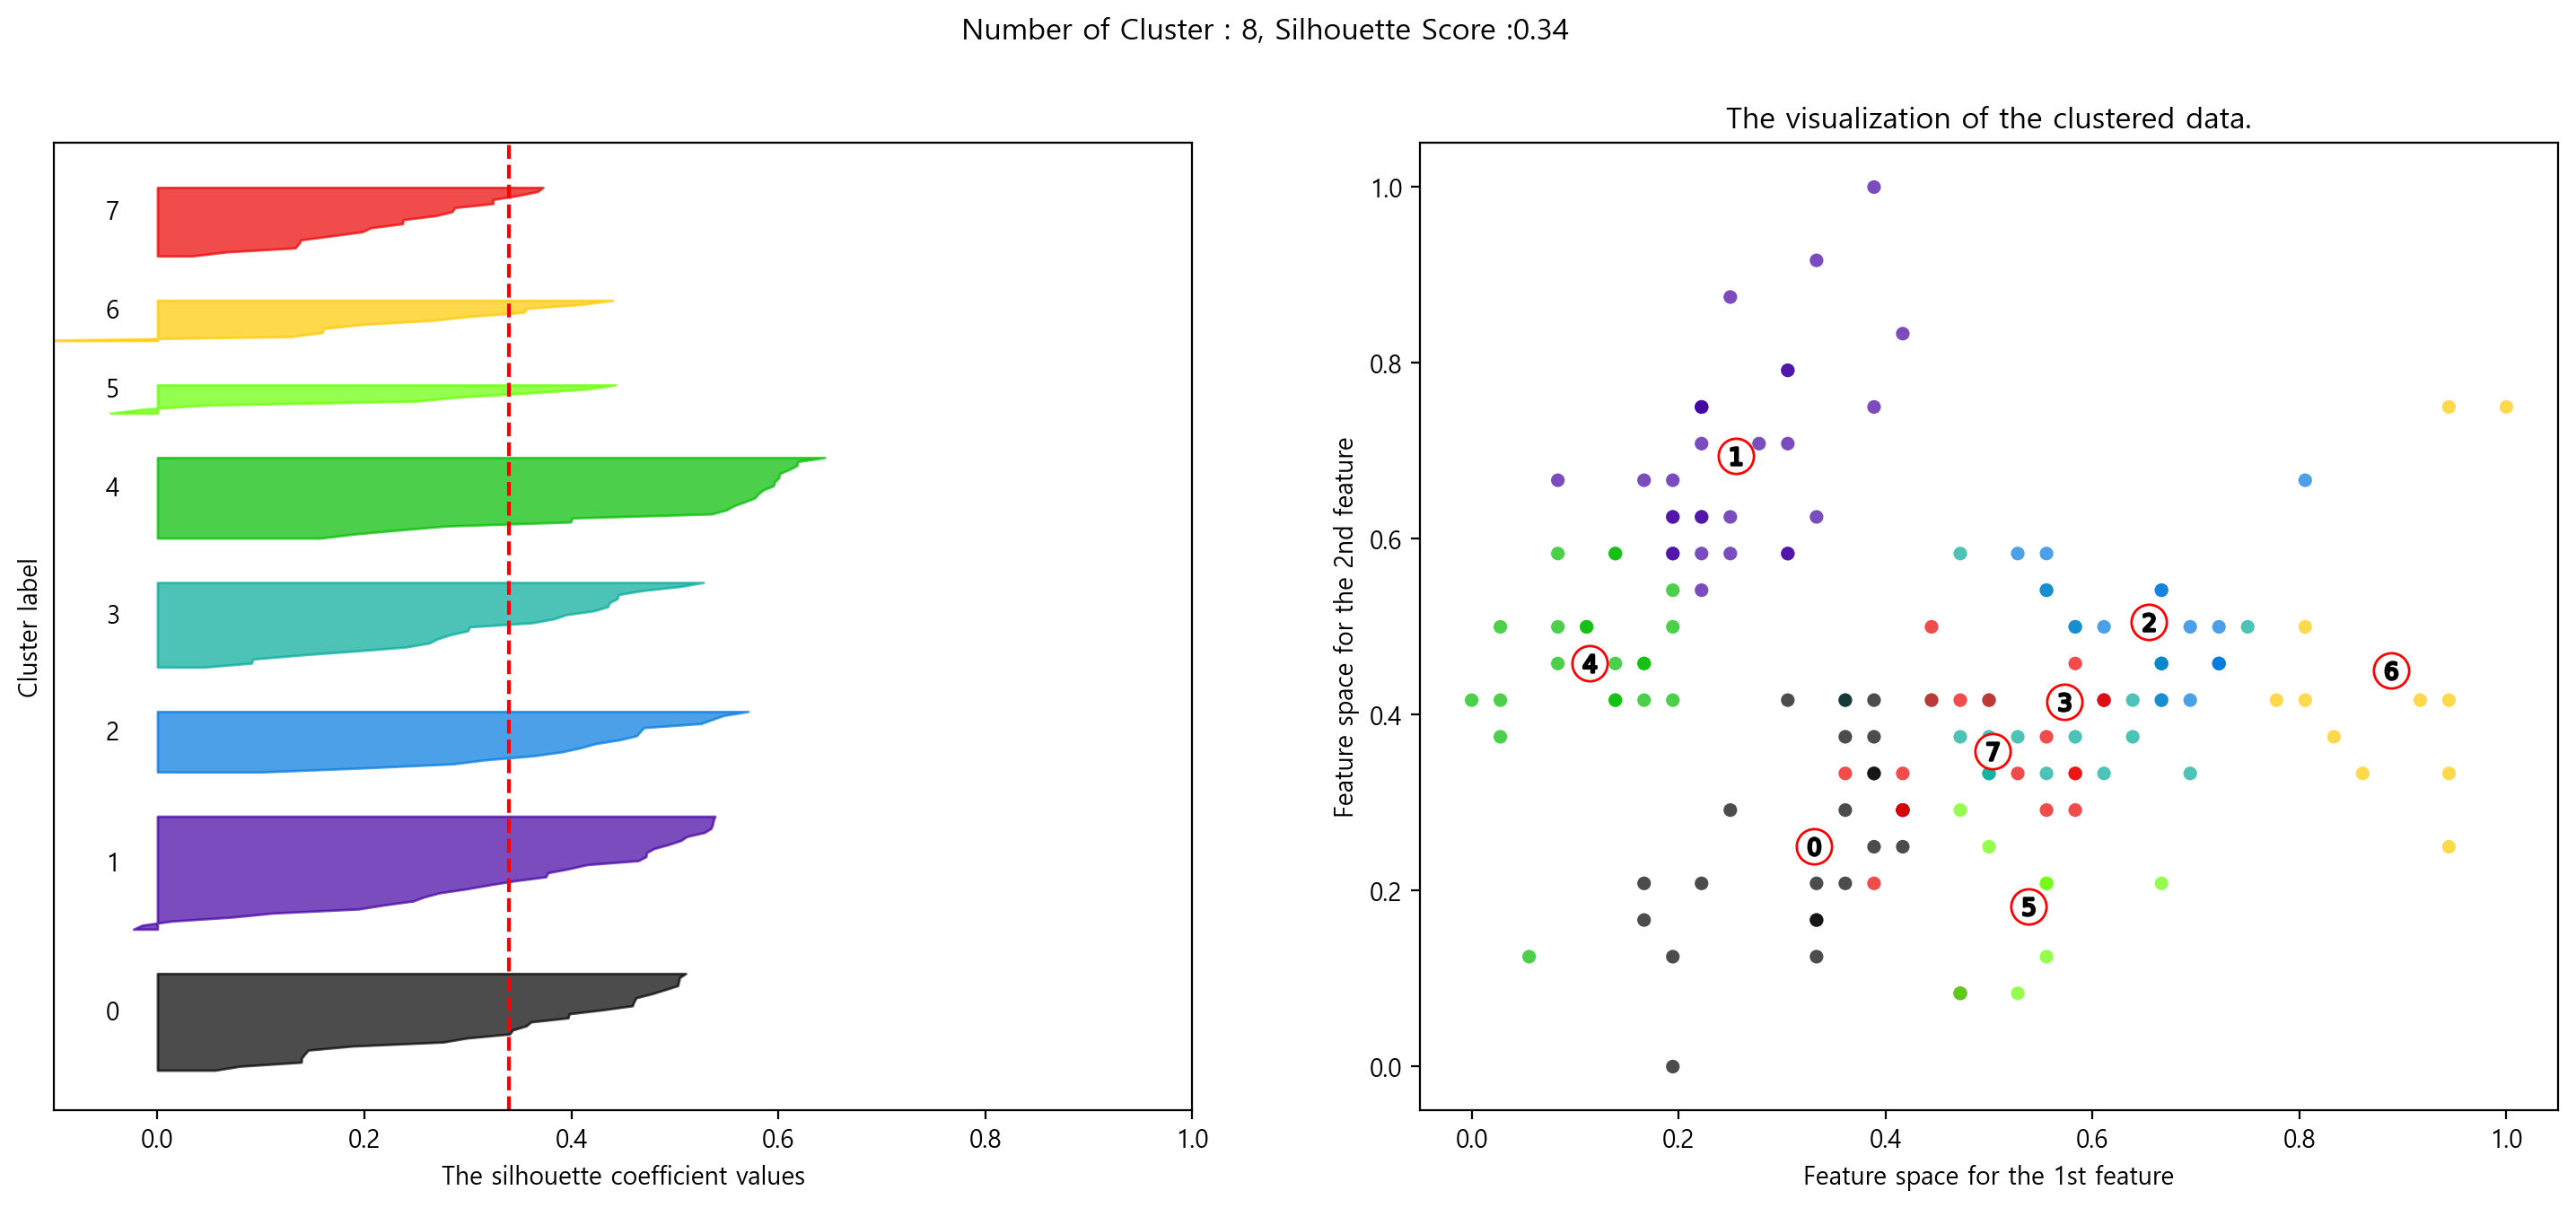

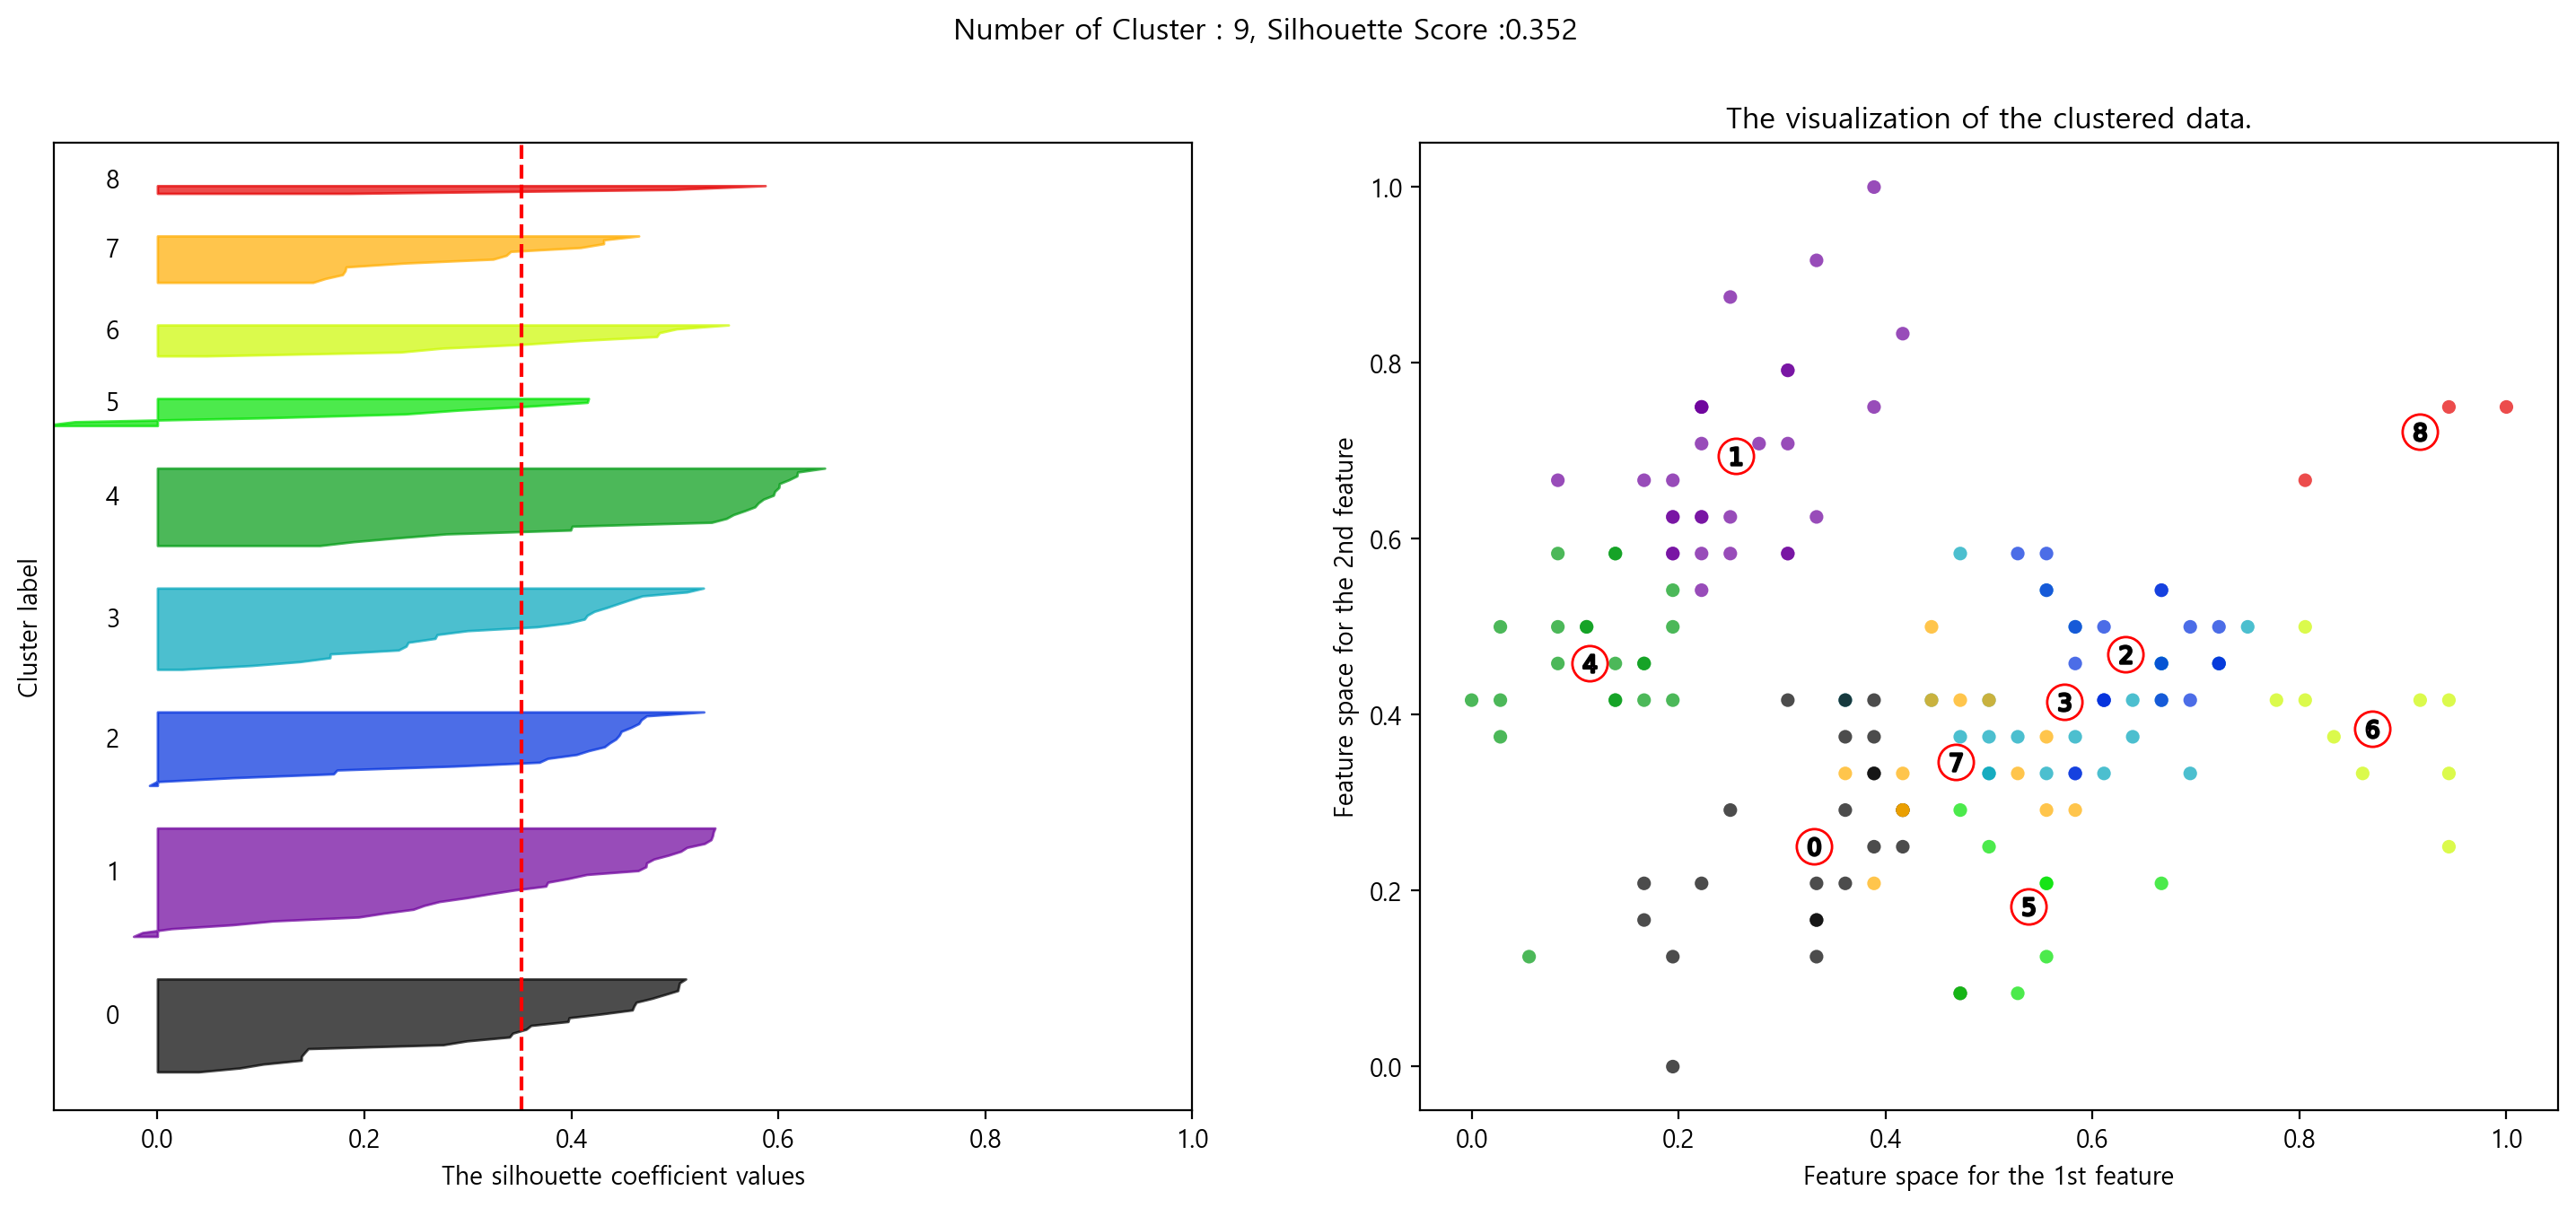

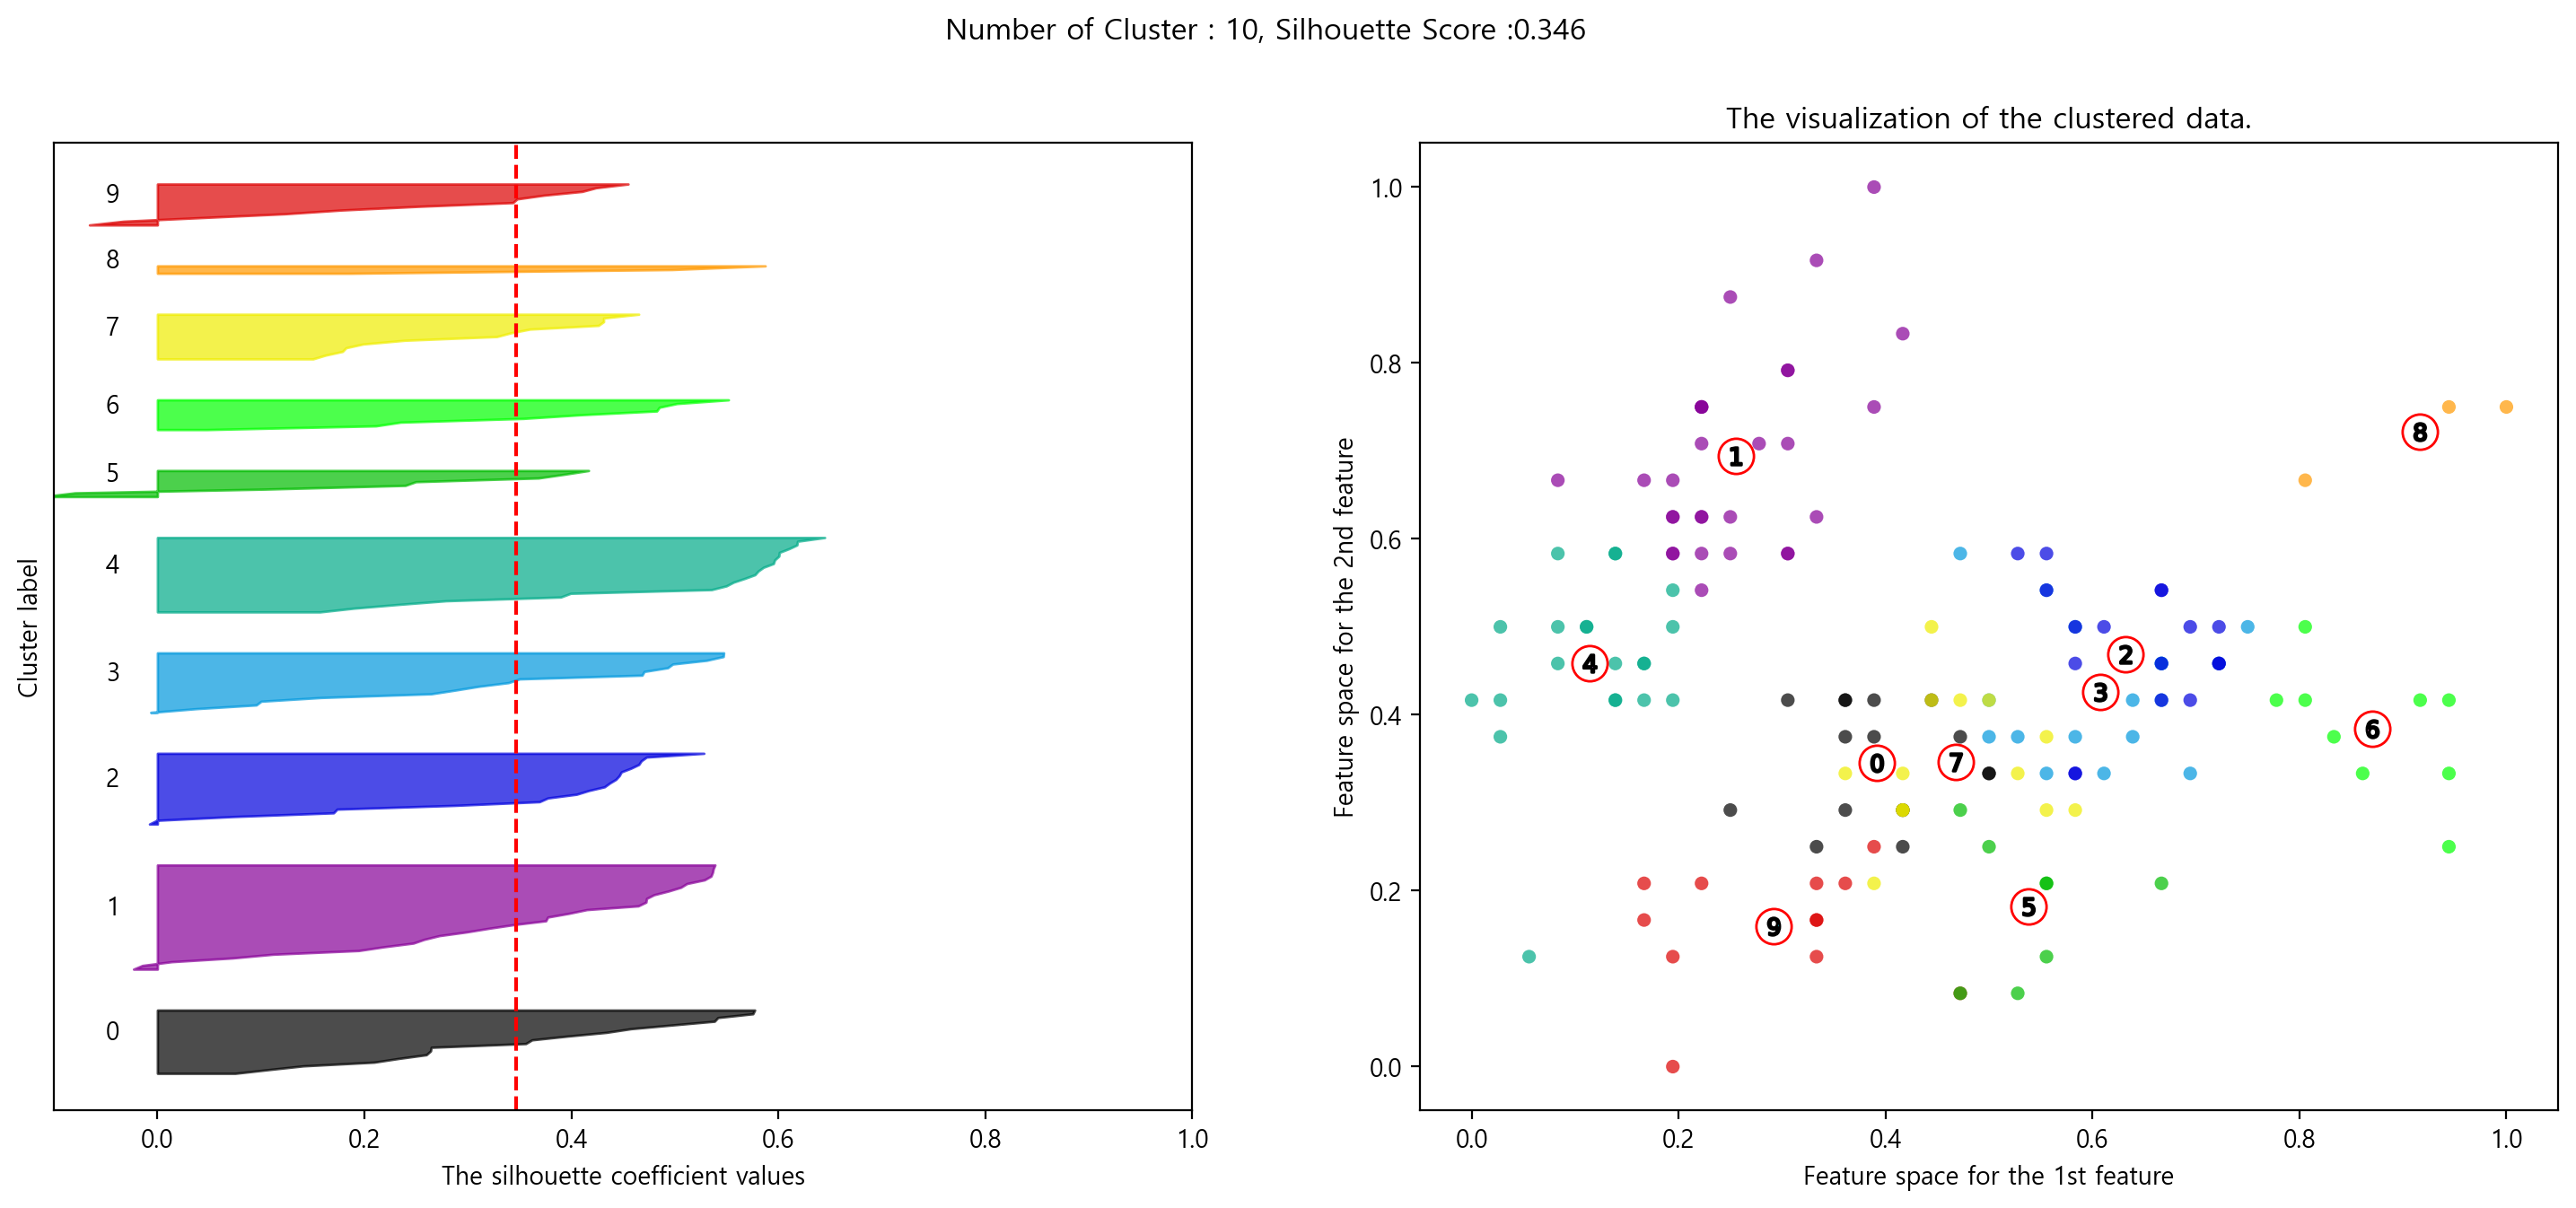

In [24]:
klist = list(range(2, 11))
silhouette = []

for k in klist:
    estimator = KMeans(n_clusters=k, random_state=0)
    estimator.fit(X=df2)
    cluster = estimator.predict(df2)
    silhouette.append(silhouette_score(X=df2, labels=cluster, metric='euclidean'))
    
    visualize_silhouette(estimator=estimator, X_features=df2, cluster_labels=cluster, n_cluster=k)

- next : iter 객체에서 실행할때 마다 다음 인덱스 원소를 출력